# **Computation of PPP Metrics for Ensemble Runs**

**Important metrics:**

- SH sea ice extent/volume
- regional sea ice extent/volume
- regional NPP, PCO2, SSS, SST
- gridpoint-level fields for sea ice concentration, SST, SSS, NPP, PCO2
- sea ice edge position (latitude at which sea ice concentration drops below 15%)

In [1]:
import os
import warnings
warnings.filterwarnings("ignore", message="invalid value encountered in true_divide")
warnings.filterwarnings("ignore", message="Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range")
warnings.filterwarnings("ignore", message="invalid value encountered in reduce")

import xarray as xr
import numpy as np
import math
import matplotlib.pyplot as plt
from cftime import DatetimeNoLeap

%load_ext autoreload
%autoreload 2
import hmei.processing as pcs
import hmei.visualization as vis

In [2]:
rootdir = '/local/projects/so_predict/esm2m_froelicher/'
writedir = '/home/bbuchovecky/storage/so_predict_derived/'

# Import Control Run Data

In [3]:
## variable names
CN_INV = 'CN_INV'
NPP = 'NPP'
PCO2SURF = 'PCO2SURF'
SIE = 'SIE'
SIV = 'SIV'
SI_EDGE = 'SI_EDGE'
SSS = 'SSS'
SST = 'SST'
MLD ='MLD'

In [4]:
def open_ctrl(var, reg, timescale):
    writedir = '/home/bbuchovecky/storage/so_predict_derived/'
    subdir = 'CTRL/'
    filename = var.lower()+'_'+reg+'_'+timescale+'_mean.nc'
    return xr.open_dataset(writedir+subdir+var.upper()+'/'+filename)

sst_global_annual_mean  = open_ctrl(SST,'global','annual')
sss_global_annual_mean  = open_ctrl(SSS,'global','annual')
pco2_global_annual_mean = open_ctrl(PCO2SURF,'global','annual')
npp_global_annual_mean  = open_ctrl(NPP,'global','annual')
cn_global_annual_mean   = open_ctrl(CN_INV,'global','annual')
sie_global_annual_mean  = open_ctrl(SIE,'global','annual')
siv_global_annual_mean  = open_ctrl(SIV,'global','annual')
mld_global_annual_mean = open_ctrl(MLD,'global','annual')

sst_global_monthly_mean  = open_ctrl(SST,'global','monthly')
sss_global_monthly_mean  = open_ctrl(SSS,'global','monthly')
pco2_global_monthly_mean = open_ctrl(PCO2SURF,'global','monthly')
npp_global_monthly_mean  = open_ctrl(NPP,'global','monthly')
cn_global_monthly_mean   = open_ctrl(CN_INV,'global','monthly')
sie_global_monthly_mean  = open_ctrl(SIE,'global','monthly')
siv_global_monthly_mean  = open_ctrl(SIV,'global','monthly')
mld_global_monthly_mean = open_ctrl(MLD,'global','monthly')

sst_so_annual_mean  = open_ctrl(SST,'so','annual')
sss_so_annual_mean  = open_ctrl(SSS,'so','annual')
pco2_so_annual_mean = open_ctrl(PCO2SURF,'so','annual')
npp_so_annual_mean  = open_ctrl(NPP,'so','annual')
cn_so_annual_mean   = open_ctrl(CN_INV,'so','annual')
sie_so_annual_mean  = open_ctrl(SIE,'so','annual')
siv_so_annual_mean  = open_ctrl(SIV,'so','annual')
mld_so_annual_mean = open_ctrl(MLD,'so','annual')

sst_so_monthly_mean  = open_ctrl(SST,'so','monthly')
sss_so_monthly_mean  = open_ctrl(SSS,'so','monthly')
pco2_so_monthly_mean = open_ctrl(PCO2SURF,'so','monthly')
npp_so_monthly_mean  = open_ctrl(NPP,'so','monthly')
cn_so_monthly_mean   = open_ctrl(CN_INV,'so','monthly')
sie_so_monthly_mean  = open_ctrl(SIE,'so','monthly')
siv_so_monthly_mean  = open_ctrl(SIV,'so','monthly')
mld_so_monthly_mean = open_ctrl(MLD,'so','monthly')

## Compute Climatology

In [5]:
sst_global_annual_clim = sst_global_annual_mean.mean(dim='year')
sss_global_annual_clim = sss_global_annual_mean.mean(dim='year')
pco2_global_annual_clim = pco2_global_annual_mean.mean(dim='year')
npp_global_annual_clim = npp_global_annual_mean.mean(dim='year')
cn_global_annual_clim = cn_global_annual_mean.mean(dim='year')
sie_global_annual_clim = sie_global_annual_mean.mean(dim='year')
siv_global_annual_clim = siv_global_annual_mean.mean(dim='year')
mld_global_annual_clim = mld_global_annual_mean.mean(dim='year')

sst_so_annual_clim = sst_so_annual_mean.mean(dim='year')
sss_so_annual_clim = sss_so_annual_mean.mean(dim='year')
pco2_so_annual_clim = pco2_so_annual_mean.mean(dim='year')
npp_so_annual_clim = npp_so_annual_mean.mean(dim='year')
cn_so_annual_clim = cn_so_annual_mean.mean(dim='year')
sie_so_annual_clim = sie_so_annual_mean.mean(dim='year')
siv_so_annual_clim = siv_so_annual_mean.mean(dim='year')
mld_so_annual_clim = mld_so_annual_mean.mean(dim='year')


sst_global_monthly_clim = sst_global_monthly_mean.groupby('time.month').mean(dim='time')
sss_global_monthly_clim = sss_global_monthly_mean.groupby('time.month').mean(dim='time')
pco2_global_monthly_clim = pco2_global_monthly_mean.groupby('time.month').mean(dim='time')
npp_global_monthly_clim = npp_global_monthly_mean.groupby('time.month').mean(dim='time')
cn_global_monthly_clim = cn_global_monthly_mean.groupby('time.month').mean(dim='time')
sie_global_monthly_clim = sie_global_monthly_mean.groupby('time.month').mean(dim='time')
siv_global_monthly_clim = siv_global_monthly_mean.groupby('time.month').mean(dim='time')
mld_global_monthly_clim = mld_global_monthly_mean.groupby('time.month').mean(dim='time')

sst_so_monthly_clim = sst_so_monthly_mean.groupby('time.month').mean(dim='time')
sss_so_monthly_clim = sss_so_monthly_mean.groupby('time.month').mean(dim='time')
pco2_so_monthly_clim = pco2_so_monthly_mean.groupby('time.month').mean(dim='time')
npp_so_monthly_clim = npp_so_monthly_mean.groupby('time.month').mean(dim='time')
cn_so_monthly_clim = cn_so_monthly_mean.groupby('time.month').mean(dim='time')
sie_so_monthly_clim = sie_so_monthly_mean.groupby('time.month').mean(dim='time')
siv_so_monthly_clim = siv_so_monthly_mean.groupby('time.month').mean(dim='time')
mld_so_monthly_clim = mld_so_monthly_mean.groupby('time.month').mean(dim='time')

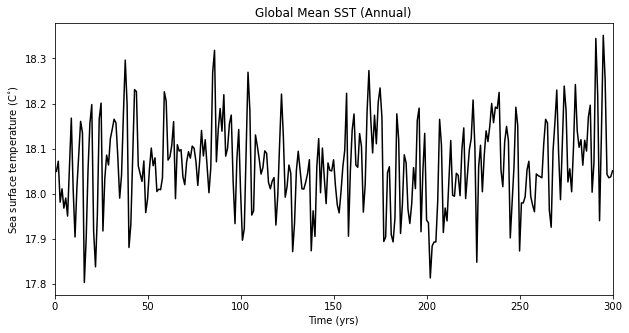

In [6]:
fig,ax = plt.subplots(figsize=(10,5))

ax.plot(sst_global_annual_mean['year'], sst_global_annual_mean['Global'], color='k');
ax.set(title='Global Mean SST (Annual)', xlabel='Time (yrs)', ylabel='Sea surface temperature (C$^{\circ}$)', xlim=[0,300]);

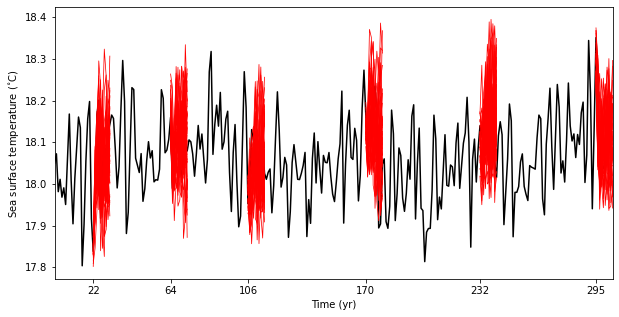

In [139]:
## recreate plot from Froelicher et al. 2020

# interp_rng = np.arange(0,300,(1/12))
# sst_ctrl = sst_global_annual_mean['Global']
# sst_ctrl = np.interp(interp_rng, sst_ctrl['year'], sst_ctrl)

# sst_ctrl = sst_global_monthly_mean['Global']
sst_ctrl = sst_global_annual_mean['Global']


# sst_ens = xr.open_dataset('/home/bbuchovecky/storage/so_predict_derived/SST_ENSEMBLE/sst_ens_global_monthly_mean.nc')
sst_ens = xr.open_dataset('/home/bbuchovecky/storage/so_predict_derived/SST_ENSEMBLE/sst_ens_global_annual_mean.nc')

ens_yrs = np.array([22,64,106,170,232,295])

fig,ax = plt.subplots(figsize=(10,5))
ax.plot(np.arange(1,301), sst_ctrl, color='k');

for nS in range(6):
    yr = int(str(t['nStart'][nS].values).split('_')[0][1:])
    for ens in range(40):
#         ax.plot(((yr-1)*12)+np.arange(120), sst_ens['Global'][nS,ens]-273.15, color='red', linewidth=0.75)
        ax.plot(yr+np.arange(10), sst_ens['Global'][nS,ens]-273.15, color='red', linewidth=0.75)

ax.set(xlim=[1,304], xticks=ens_yrs, xticklabels=ens_yrs, xlabel='Time (yr)', ylabel='Sea surface temperature ($^{\circ}$C)');
# ax.set(xlim=[295,305]);

# MEAN

## Global

In [22]:
def compute_ens_global_mean(variables, timescale, save=False, SIE=False, SIV=False):
    
    rootdir = '/local/projects/so_predict/esm2m_froelicher/'
    writedir = '/home/bbuchovecky/storage/so_predict_derived/'
    
    reg_masks = xr.open_dataset(writedir+'regional_global_masks.nc')
    regions = list(reg_masks.data_vars)

    ocean_grid = xr.open_dataset(rootdir+'GRID/ocean.static.nc')
    geolat_t = ocean_grid.geolat_t
    geolon_t = ocean_grid.geolon_t
    
    months = 120

    nT_months = np.arange(1,months+1)
    nT_years = np.arange(1,(months/12)+1)
    nStart = np.arange(1,7)
    nEns = np.empty(0, dtype=str)

    start_yrs = ['0170_0179', '0022_0031', '0064_0073', '0106_0115', '0232_0241', '0295_0304']
    
    ## iterate through all variables
    for var in variables:
        ## update status
        print('\n######## '+var[0]+' ########\n')

        subdir = var[0]+'_ENSEMBLE/'

        ## list with datasets for each start year (includes 40 ensembles)
        yrs_list = []

        ## iterate through the start years
        for (i,yrs) in zip(range(1,7), start_yrs):

            ## list with datasets for each ensemble run (pos/neg, 1-20)
            ens_list = []

            ## reset 'nEns' coord list
            nEns = np.empty(0, dtype=str)

            ## iterate through ensembles
            for sign in ['neg', 'pos']:
                for pert in range(1,21):
                    filename = var[1]+'_ENS'+f'{i:02}'+'_'+sign+f'{pert:02}'+'_'+yrs+'.nc'
                    
                    nEns = np.append(nEns, sign+f'{pert:02}')

                    ds = xr.open_dataset(rootdir+subdir+filename)
                    
                    ## reassign coord names to ensure continuity between datasets
                    coords = list(ds.coords)
                    if (coords.count('XT') == 1) and (coords.count('YT') == 1) and (coords.count('TIME') == 1):
                        ds = ds.rename({'XT':'xt_ocean', 'YT':'yt_ocean', 'TIME':'time'})

                    if (coords.count('XT_OCEAN') == 1) and (coords.count('YT_OCEAN') == 1) and (coords.count('TIME') == 1):
                        ds = ds.rename({'XT_OCEAN':'xt_ocean', 'YT_OCEAN':'yt_ocean', 'TIME':'time'})
                        
                    if (coords.count('xt') == 1) and (coords.count('yt') == 1):
                        ds = ds.rename({'xt':'xt_ocean', 'yt':'yt_ocean'})
                        
                    ## truncate at 120 months for CN_INV
                    if ds['time'].size > months:
                        time = xr.cftime_range(start='0000', periods=months, freq='MS', calendar='noleap')
                        temp = ds.copy(deep=True)
                        ds = ds.drop('time')
                        ds = ds.drop_vars(var[2])
                        ds = ds.assign_coords({'time':time})
                        ds[var[2]] = (('time','yt_ocean','xt_ocean'), temp[var[2]][:months])
                                            
                    ## assign ocean_grid coords for continuity
                    ds = ds.assign_coords({'xt_ocean':ocean_grid.xt_ocean, 'yt_ocean':ocean_grid.yt_ocean})
                    
                    ## remove 'area_t' gridcells on land, keep only the ocean
                    area = xr.where(np.isnan(ds[var[2]][0]), np.nan, ocean_grid['area_t'])

                    ## total ocean area in the region
                    area_sum = area.sum(dim={'xt_ocean', 'yt_ocean'})
                    
                    ## load and format SIC data for SIV computation
                    if SIV:
                        sie_area = xr.open_dataset(rootdir+'CN_ENSEMBLE/CN_inv_ENS'+f'{i:02}'+'_'+sign+f'{pert:02}'+'_'+yrs+'.nc')
                        sie_area = sie_area.rename({'XT':'xt_ocean', 'YT':'yt_ocean', 'TIME':'time'})
                        sie_area = sie_area.assign_coords({'xt_ocean':ocean_grid.xt_ocean, 'yt_ocean':ocean_grid.yt_ocean})
        
                        if sie_area['CN_INV'].size > months:
                            temp = sie_area.copy(deep=True)
                            sie_area = sie_area.drop('time')
                            sie_area = sie_area.drop_vars('CN_INV')
                            sie_area['CN_INV'] = (('time','yt_ocean','xt_ocean'), temp['CN_INV'][:months])
                        
                        sie_area = sie_area.assign_coords({'time':ds['time']})
                        sie_area.transpose()
                        sie_area = sie_area['CN_INV'] * area
                        
                    ## threshold SIE at >15% SIC
                    if SIE:
                        gridcell = xr.where(ds[var[2]] > 0.15, 1, 0)

                    if timescale == 'annual':                      
                        if SIE:
                            mean = (gridcell * ocean_grid['area_t']).groupby('time.year').mean(dim='time').sum(dim={'xt_ocean', 'yt_ocean'})
                            
                        elif SIV:
                            mean = (ds[var[2]] * sie_area).groupby('time.year').mean(dim='time').sum(dim={'xt_ocean', 'yt_ocean'})
                        
                        else:                          
                            ## annual mean - compute areal integral for each year
                            ## (1) find annual mean value for each gridcell
                            ## (2) compute areal integral for the annual mean gridcells
                            mean = (ds[var[2]] * ocean_grid['area_t']).groupby('time.year').mean(dim='time').sum(dim={'xt_ocean', 'yt_ocean'}) / area_sum

                        ## reassign 'time' cftime coord to 'nT' integer coord from 1-10
                        if list(mean.coords).count('time') > 0:
                            mean = mean.drop('time')
                        mean = mean.rename({'year':'nT'})
                        mean = mean.assign_coords({'nT':nT_years})

                    if timescale == 'monthly':
                        if SIE:
                            mean = (gridcell * ocean_grid['area_t']).sum(dim={'xt_ocean', 'yt_ocean'})
                            
                        elif SIV:
                            mean = (ds[var[2]] * sie_area).sum(dim={'xt_ocean', 'yt_ocean'})
                        
                        else:
                            ## monthly mean - compute areal integral for each month
                            mean = (ds[var[2]] * ocean_grid['area_t']).sum(dim={'xt_ocean', 'yt_ocean'}) / area_sum

                        ## reassign 'time' cftime coord to 'nT' integer coord from 1-120
                        mean = mean.rename({'time':'nT'})
                        mean = mean.assign_coords({'nT':nT_months})

                    ## rename the array to the region's name
                    mean.name = 'Global'

                    ## convert the array to a dataset
                    this_ens = mean.to_dataset()

                    ## append a copy of the dataset to the ensembles list
                    ens_list.append(this_ens.copy(deep=True))

                    ## update status
                    if (i == 1) and (sign == 'neg') and (pert == 1):
                        print('this_ens.coords = '+str(list(this_ens.coords)))
                        print('this_ens.data_vars = '+str(list(this_ens.data_vars))+'\n')

                    print('o',end='')
                    if pert == 20:
                        print('')

                ## update status
                if sign == 'neg':
                    print('var: '+var[2]+' | nStart: '+str(i)+' | nEns: 20/40')
                if sign == 'pos':
                    print('var: '+var[2]+' | nStart: '+str(i)+' | nEns: 40/40')

            ## concatenate ensemble arrays along new 'nEns' dimension
            these_ens = xr.concat(ens_list, 'nEns')
            these_ens = these_ens.assign_coords({'nEns':nEns}) 

            ## append a copy of the dataset to the start years list
            yrs_list.append(these_ens.copy(deep=True))

            ## update status
            if i == 1:
                print('\nthese_ens.coords = '+str(list(these_ens.coords)))
                print('these_ens.data_vars = '+str(list(these_ens.data_vars))+'\n')

        ## concatenate start years arrays along new 'nStart' dimension
        all_ens = xr.concat(yrs_list, 'nStart')
        all_ens = all_ens.assign_coords({'nStart':start_yrs})

        ## copy attributes to each region data variable
        all_ens['Global'].attrs = mean.attrs

        ## add description
        if SIE:
            filename = 'sie_ens_global_'+timescale+'_mean.nc'
        if SIV:
            filename = 'siv_ens_global_'+timescale+'_mean.nc'
        if not SIE and not SIV:
            filename = var[1].lower()+'_ens_global_'+timescale+'_mean.nc'
        all_ens.attrs['name'] = filename

        print('\nall_ens.coords = '+str(list(all_ens.coords)))
        print('all_ens.data_vars = '+str(list(all_ens.data_vars))+'\n')

        if save:
            if var[0] == 'CN':
                subdir = var[2]+'_ENSEMBLE/'
            if SIE:
                subdir = 'SIE_ENSEMBLE/'
            if SIV:
                subdir = 'SIV_ENSEMBLE/'
            all_ens.to_netcdf(writedir+subdir+filename)
            print(writedir+subdir+filename)

        elif not save:
            return all_ens

### Monthly

In [119]:
compute_ens_global_mean([['SST','sst','sst']], 'monthly', save=True)


######## SST ########

this_ens.coords = ['nT']
this_ens.data_vars = ['Global']

oo

KeyboardInterrupt: 

In [89]:
compute_ens_global_mean([['SSS','sss','sss']], 'monthly', save=True)


######## SSS ########

this_ens.coords = ['nT']
this_ens.data_vars = ['Global']

oooooooooooooooooooo
var: sss | nStart: 1 | nEns: 20/40
oooooooooooooooooooo
var: sss | nStart: 1 | nEns: 40/40

these_ens.coords = ['nT', 'nEns']
these_ens.data_vars = ['Global']

oooooooooooooooooooo
var: sss | nStart: 2 | nEns: 20/40
oooooooooooooooooooo
var: sss | nStart: 2 | nEns: 40/40
oooooooooooooooooooo
var: sss | nStart: 3 | nEns: 20/40
oooooooooooooooooooo
var: sss | nStart: 3 | nEns: 40/40
oooooooooooooooooooo
var: sss | nStart: 4 | nEns: 20/40
oooooooooooooooooooo
var: sss | nStart: 4 | nEns: 40/40
oooooooooooooooooooo
var: sss | nStart: 5 | nEns: 20/40
oooooooooooooooooooo
var: sss | nStart: 5 | nEns: 40/40
oooooooooooooooooooo
var: sss | nStart: 6 | nEns: 20/40
oooooooooooooooooooo
var: sss | nStart: 6 | nEns: 40/40

all_ens.coords = ['nT', 'nEns', 'nStart']
all_ens.data_vars = ['Global']

/home/bbuchovecky/storage/so_predict_derived/SSS_ENSEMBLE/sss_ens_global_monthly_mean.nc


In [90]:
compute_ens_global_mean([['MLD','mld','mld']], 'monthly', save=True)


######## MLD ########

this_ens.coords = ['nT']
this_ens.data_vars = ['Global']

oooooooooooooooooooo
var: mld | nStart: 1 | nEns: 20/40
oooooooooooooooooooo
var: mld | nStart: 1 | nEns: 40/40

these_ens.coords = ['nT', 'nEns']
these_ens.data_vars = ['Global']

oooooooooooooooooooo
var: mld | nStart: 2 | nEns: 20/40
oooooooooooooooooooo
var: mld | nStart: 2 | nEns: 40/40
oooooooooooooooooooo
var: mld | nStart: 3 | nEns: 20/40
oooooooooooooooooooo
var: mld | nStart: 3 | nEns: 40/40
oooooooooooooooooooo
var: mld | nStart: 4 | nEns: 20/40
oooooooooooooooooooo
var: mld | nStart: 4 | nEns: 40/40
oooooooooooooooooooo
var: mld | nStart: 5 | nEns: 20/40
oooooooooooooooooooo
var: mld | nStart: 5 | nEns: 40/40
oooooooooooooooooooo
var: mld | nStart: 6 | nEns: 20/40
oooooooooooooooooooo
var: mld | nStart: 6 | nEns: 40/40

all_ens.coords = ['nT', 'nEns', 'nStart']
all_ens.data_vars = ['Global']

/home/bbuchovecky/storage/so_predict_derived/MLD_ENSEMBLE/mld_ens_global_monthly_mean.nc


In [91]:
compute_ens_global_mean([['NPP','NPP','NPP']], 'monthly', save=True)


######## NPP ########

this_ens.coords = ['nT']
this_ens.data_vars = ['Global']

oooooooooooooooooooo
var: NPP | nStart: 1 | nEns: 20/40
oooooooooooooooooooo
var: NPP | nStart: 1 | nEns: 40/40

these_ens.coords = ['nT', 'nEns']
these_ens.data_vars = ['Global']

oooooooooooooooooooo
var: NPP | nStart: 2 | nEns: 20/40
oooooooooooooooooooo
var: NPP | nStart: 2 | nEns: 40/40
oooooooooooooooooooo
var: NPP | nStart: 3 | nEns: 20/40
oooooooooooooooooooo
var: NPP | nStart: 3 | nEns: 40/40
oooooooooooooooooooo
var: NPP | nStart: 4 | nEns: 20/40
oooooooooooooooooooo
var: NPP | nStart: 4 | nEns: 40/40
oooooooooooooooooooo
var: NPP | nStart: 5 | nEns: 20/40
oooooooooooooooooooo
var: NPP | nStart: 5 | nEns: 40/40
oooooooooooooooooooo
var: NPP | nStart: 6 | nEns: 20/40
oooooooooooooooooooo
var: NPP | nStart: 6 | nEns: 40/40

all_ens.coords = ['nT', 'nEns', 'nStart']
all_ens.data_vars = ['Global']

/home/bbuchovecky/storage/so_predict_derived/NPP_ENSEMBLE/npp_ens_global_monthly_mean.nc


In [92]:
compute_ens_global_mean([['PCO2SURF','pco2surf','pco2surf']], 'monthly', save=True)


######## PCO2SURF ########

this_ens.coords = ['nT']
this_ens.data_vars = ['Global']

oooooooooooooooooooo
var: pco2surf | nStart: 1 | nEns: 20/40
oooooooooooooooooooo
var: pco2surf | nStart: 1 | nEns: 40/40

these_ens.coords = ['nT', 'nEns']
these_ens.data_vars = ['Global']

oooooooooooooooooooo
var: pco2surf | nStart: 2 | nEns: 20/40
oooooooooooooooooooo
var: pco2surf | nStart: 2 | nEns: 40/40
oooooooooooooooooooo
var: pco2surf | nStart: 3 | nEns: 20/40
oooooooooooooooooooo
var: pco2surf | nStart: 3 | nEns: 40/40
oooooooooooooooooooo
var: pco2surf | nStart: 4 | nEns: 20/40
oooooooooooooooooooo
var: pco2surf | nStart: 4 | nEns: 40/40
oooooooooooooooooooo
var: pco2surf | nStart: 5 | nEns: 20/40
oooooooooooooooooooo
var: pco2surf | nStart: 5 | nEns: 40/40
oooooooooooooooooooo
var: pco2surf | nStart: 6 | nEns: 20/40
oooooooooooooooooooo
var: pco2surf | nStart: 6 | nEns: 40/40

all_ens.coords = ['nT', 'nEns', 'nStart']
all_ens.data_vars = ['Global']

/home/bbuchovecky/storage/so_predict_

In [8]:
compute_ens_global_mean([['CN','CN_inv','CN_INV']], 'monthly', save=True)


######## CN ########

this_ens.coords = ['nT']
this_ens.data_vars = ['Global']

oooooooooooooooooooo
var: CN_INV | nStart: 1 | nEns: 20/40
oooooooooooooooooooo
var: CN_INV | nStart: 1 | nEns: 40/40

these_ens.coords = ['nT', 'nEns']
these_ens.data_vars = ['Global']

oooooooooooooooooooo
var: CN_INV | nStart: 2 | nEns: 20/40
oooooooooooooooooooo
var: CN_INV | nStart: 2 | nEns: 40/40
oooooooooooooooooooo
var: CN_INV | nStart: 3 | nEns: 20/40
oooooooooooooooooooo
var: CN_INV | nStart: 3 | nEns: 40/40
oooooooooooooooooooo
var: CN_INV | nStart: 4 | nEns: 20/40
oooooooooooooooooooo
var: CN_INV | nStart: 4 | nEns: 40/40
oooooooooooooooooooo
var: CN_INV | nStart: 5 | nEns: 20/40
oooooooooooooooooooo
var: CN_INV | nStart: 5 | nEns: 40/40
oooooooooooooooooooo
var: CN_INV | nStart: 6 | nEns: 20/40
oooooooooooooooooooo
var: CN_INV | nStart: 6 | nEns: 40/40

all_ens.coords = ['nT', 'nEns', 'nStart']
all_ens.data_vars = ['Global']

/home/bbuchovecky/storage/so_predict_derived/CN_INV_ENSEMBLE/cn_inv

In [23]:
compute_ens_global_mean([['CN','CN_inv','CN_INV']], 'monthly', save=True, SIE=True)


######## CN ########

this_ens.coords = ['nT']
this_ens.data_vars = ['Global']

oooooooooooooooooooo
var: CN_INV | nStart: 1 | nEns: 20/40
oooooooooooooooooooo
var: CN_INV | nStart: 1 | nEns: 40/40

these_ens.coords = ['nT', 'nEns']
these_ens.data_vars = ['Global']

oooooooooooooooooooo
var: CN_INV | nStart: 2 | nEns: 20/40
oooooooooooooooooooo
var: CN_INV | nStart: 2 | nEns: 40/40
oooooooooooooooooooo
var: CN_INV | nStart: 3 | nEns: 20/40
oooooooooooooooooooo
var: CN_INV | nStart: 3 | nEns: 40/40
oooooooooooooooooooo
var: CN_INV | nStart: 4 | nEns: 20/40
oooooooooooooooooooo
var: CN_INV | nStart: 4 | nEns: 40/40
oooooooooooooooooooo
var: CN_INV | nStart: 5 | nEns: 20/40
oooooooooooooooooooo
var: CN_INV | nStart: 5 | nEns: 40/40
oooooooooooooooooooo
var: CN_INV | nStart: 6 | nEns: 20/40
oooooooooooooooooooo
var: CN_INV | nStart: 6 | nEns: 40/40

all_ens.coords = ['nT', 'nEns', 'nStart']
all_ens.data_vars = ['Global']

/home/bbuchovecky/storage/so_predict_derived/SIE_ENSEMBLE/sie_ens_g

In [24]:
compute_ens_global_mean([['HI','HI_ice','HI']], 'monthly', save=True, SIV=True)


######## HI ########

this_ens.coords = ['nT']
this_ens.data_vars = ['Global']

oooooooooooooooooooo
var: HI | nStart: 1 | nEns: 20/40
oooooooooooooooooooo
var: HI | nStart: 1 | nEns: 40/40

these_ens.coords = ['nT', 'nEns']
these_ens.data_vars = ['Global']

oooooooooooooooooooo
var: HI | nStart: 2 | nEns: 20/40
oooooooooooooooooooo
var: HI | nStart: 2 | nEns: 40/40
oooooooooooooooooooo
var: HI | nStart: 3 | nEns: 20/40
oooooooooooooooooooo
var: HI | nStart: 3 | nEns: 40/40
oooooooooooooooooooo
var: HI | nStart: 4 | nEns: 20/40
oooooooooooooooooooo
var: HI | nStart: 4 | nEns: 40/40
oooooooooooooooooooo
var: HI | nStart: 5 | nEns: 20/40
oooooooooooooooooooo
var: HI | nStart: 5 | nEns: 40/40
oooooooooooooooooooo
var: HI | nStart: 6 | nEns: 20/40
oooooooooooooooooooo
var: HI | nStart: 6 | nEns: 40/40

all_ens.coords = ['nT', 'nEns', 'nStart']
all_ens.data_vars = ['Global']

/home/bbuchovecky/storage/so_predict_derived/SIV_ENSEMBLE/siv_ens_global_monthly_mean.nc


### Annual

In [123]:
compute_ens_global_mean([['SST','sst','sst']], 'annual', save=True)


######## SST ########

this_ens.coords = ['nT']
this_ens.data_vars = ['Global']

oooooooooooooooooooo
var: sst | nStart: 1 | nEns: 20/40
oooooooooooooooooooo
var: sst | nStart: 1 | nEns: 40/40

these_ens.coords = ['nT', 'nEns']
these_ens.data_vars = ['Global']

oooooooooooooooooooo
var: sst | nStart: 2 | nEns: 20/40
oooooooooooooooooooo
var: sst | nStart: 2 | nEns: 40/40
oooooooooooooooooooo
var: sst | nStart: 3 | nEns: 20/40
oooooooooooooooooooo
var: sst | nStart: 3 | nEns: 40/40
oooooooooooooooooooo
var: sst | nStart: 4 | nEns: 20/40
oooooooooooooooooooo
var: sst | nStart: 4 | nEns: 40/40
oooooooooooooooooooo
var: sst | nStart: 5 | nEns: 20/40
oooooooooooooooooooo
var: sst | nStart: 5 | nEns: 40/40
oooooooooooooooooooo
var: sst | nStart: 6 | nEns: 20/40
oooooooooooooooooooo
var: sst | nStart: 6 | nEns: 40/40

all_ens.coords = ['nT', 'nEns', 'nStart']
all_ens.data_vars = ['Global']

/home/bbuchovecky/storage/so_predict_derived/SST_ENSEMBLE/sst_ens_global_annual_mean.nc


In [141]:
compute_ens_global_mean([['SSS','sss','sss']], 'annual', save=True)


######## SSS ########

this_ens.coords = ['nT']
this_ens.data_vars = ['Global']

oooooooooooooooooooo
var: sss | nStart: 1 | nEns: 20/40
oooooooooooooooooooo
var: sss | nStart: 1 | nEns: 40/40

these_ens.coords = ['nT', 'nEns']
these_ens.data_vars = ['Global']

oooooooooooooooooooo
var: sss | nStart: 2 | nEns: 20/40
oooooooooooooooooooo
var: sss | nStart: 2 | nEns: 40/40
oooooooooooooooooooo
var: sss | nStart: 3 | nEns: 20/40
oooooooooooooooooooo
var: sss | nStart: 3 | nEns: 40/40
oooooooooooooooooooo
var: sss | nStart: 4 | nEns: 20/40
oooooooooooooooooooo
var: sss | nStart: 4 | nEns: 40/40
oooooooooooooooooooo
var: sss | nStart: 5 | nEns: 20/40
oooooooooooooooooooo
var: sss | nStart: 5 | nEns: 40/40
oooooooooooooooooooo
var: sss | nStart: 6 | nEns: 20/40
oooooooooooooooooooo
var: sss | nStart: 6 | nEns: 40/40

all_ens.coords = ['nT', 'nEns', 'nStart']
all_ens.data_vars = ['Global']

/home/bbuchovecky/storage/so_predict_derived/SSS_ENSEMBLE/sss_ens_global_annual_mean.nc


In [142]:
compute_ens_global_mean([['MLD','mld','mld']], 'annual', save=True)


######## MLD ########

this_ens.coords = ['nT']
this_ens.data_vars = ['Global']

oooooooooooooooooooo
var: mld | nStart: 1 | nEns: 20/40
oooooooooooooooooooo
var: mld | nStart: 1 | nEns: 40/40

these_ens.coords = ['nT', 'nEns']
these_ens.data_vars = ['Global']

oooooooooooooooooooo
var: mld | nStart: 2 | nEns: 20/40
oooooooooooooooooooo
var: mld | nStart: 2 | nEns: 40/40
oooooooooooooooooooo
var: mld | nStart: 3 | nEns: 20/40
oooooooooooooooooooo
var: mld | nStart: 3 | nEns: 40/40
oooooooooooooooooooo
var: mld | nStart: 4 | nEns: 20/40
oooooooooooooooooooo
var: mld | nStart: 4 | nEns: 40/40
oooooooooooooooooooo
var: mld | nStart: 5 | nEns: 20/40
oooooooooooooooooooo
var: mld | nStart: 5 | nEns: 40/40
oooooooooooooooooooo
var: mld | nStart: 6 | nEns: 20/40
oooooooooooooooooooo
var: mld | nStart: 6 | nEns: 40/40

all_ens.coords = ['nT', 'nEns', 'nStart']
all_ens.data_vars = ['Global']

/home/bbuchovecky/storage/so_predict_derived/MLD_ENSEMBLE/mld_ens_global_annual_mean.nc


In [143]:
compute_ens_global_mean([['NPP','NPP','NPP']], 'annual', save=True)


######## NPP ########

this_ens.coords = ['nT']
this_ens.data_vars = ['Global']

oooooooooooooooooooo
var: NPP | nStart: 1 | nEns: 20/40
oooooooooooooooooooo
var: NPP | nStart: 1 | nEns: 40/40

these_ens.coords = ['nT', 'nEns']
these_ens.data_vars = ['Global']

oooooooooooooooooooo
var: NPP | nStart: 2 | nEns: 20/40
oooooooooooooooooooo
var: NPP | nStart: 2 | nEns: 40/40
oooooooooooooooooooo
var: NPP | nStart: 3 | nEns: 20/40
oooooooooooooooooooo
var: NPP | nStart: 3 | nEns: 40/40
oooooooooooooooooooo
var: NPP | nStart: 4 | nEns: 20/40
oooooooooooooooooooo
var: NPP | nStart: 4 | nEns: 40/40
oooooooooooooooooooo
var: NPP | nStart: 5 | nEns: 20/40
oooooooooooooooooooo
var: NPP | nStart: 5 | nEns: 40/40
oooooooooooooooooooo
var: NPP | nStart: 6 | nEns: 20/40
oooooooooooooooooooo
var: NPP | nStart: 6 | nEns: 40/40

all_ens.coords = ['nT', 'nEns', 'nStart']
all_ens.data_vars = ['Global']

/home/bbuchovecky/storage/so_predict_derived/NPP_ENSEMBLE/npp_ens_global_annual_mean.nc


In [144]:
compute_ens_global_mean([['PCO2SURF','pco2surf','pco2surf']], 'annual', save=True)


######## PCO2SURF ########

this_ens.coords = ['nT']
this_ens.data_vars = ['Global']

oooooooooooooooooooo
var: pco2surf | nStart: 1 | nEns: 20/40
oooooooooooooooooooo
var: pco2surf | nStart: 1 | nEns: 40/40

these_ens.coords = ['nT', 'nEns']
these_ens.data_vars = ['Global']

oooooooooooooooooooo
var: pco2surf | nStart: 2 | nEns: 20/40
oooooooooooooooooooo
var: pco2surf | nStart: 2 | nEns: 40/40
oooooooooooooooooooo
var: pco2surf | nStart: 3 | nEns: 20/40
oooooooooooooooooooo
var: pco2surf | nStart: 3 | nEns: 40/40
oooooooooooooooooooo
var: pco2surf | nStart: 4 | nEns: 20/40
oooooooooooooooooooo
var: pco2surf | nStart: 4 | nEns: 40/40
oooooooooooooooooooo
var: pco2surf | nStart: 5 | nEns: 20/40
oooooooooooooooooooo
var: pco2surf | nStart: 5 | nEns: 40/40
oooooooooooooooooooo
var: pco2surf | nStart: 6 | nEns: 20/40
oooooooooooooooooooo
var: pco2surf | nStart: 6 | nEns: 40/40

all_ens.coords = ['nT', 'nEns', 'nStart']
all_ens.data_vars = ['Global']

/home/bbuchovecky/storage/so_predict_

In [25]:
compute_ens_global_mean([['CN','CN_inv','CN_INV']], 'annual', save=True)


######## CN ########

this_ens.coords = ['nT']
this_ens.data_vars = ['Global']

oooooooooooooooooooo
var: CN_INV | nStart: 1 | nEns: 20/40
oooooooooooooooooooo
var: CN_INV | nStart: 1 | nEns: 40/40

these_ens.coords = ['nT', 'nEns']
these_ens.data_vars = ['Global']

oooooooooooooooooooo
var: CN_INV | nStart: 2 | nEns: 20/40
oooooooooooooooooooo
var: CN_INV | nStart: 2 | nEns: 40/40
oooooooooooooooooooo
var: CN_INV | nStart: 3 | nEns: 20/40
oooooooooooooooooooo
var: CN_INV | nStart: 3 | nEns: 40/40
oooooooooooooooooooo
var: CN_INV | nStart: 4 | nEns: 20/40
oooooooooooooooooooo
var: CN_INV | nStart: 4 | nEns: 40/40
oooooooooooooooooooo
var: CN_INV | nStart: 5 | nEns: 20/40
oooooooooooooooooooo
var: CN_INV | nStart: 5 | nEns: 40/40
oooooooooooooooooooo
var: CN_INV | nStart: 6 | nEns: 20/40
oooooooooooooooooooo
var: CN_INV | nStart: 6 | nEns: 40/40

all_ens.coords = ['nT', 'nEns', 'nStart']
all_ens.data_vars = ['Global']

/home/bbuchovecky/storage/so_predict_derived/CN_INV_ENSEMBLE/cn_inv

In [26]:
compute_ens_global_mean([['CN','CN_inv','CN_INV']], 'annual', save=True, SIE=True)


######## CN ########

this_ens.coords = ['nT']
this_ens.data_vars = ['Global']

oooooooooooooooooooo
var: CN_INV | nStart: 1 | nEns: 20/40
oooooooooooooooooooo
var: CN_INV | nStart: 1 | nEns: 40/40

these_ens.coords = ['nT', 'nEns']
these_ens.data_vars = ['Global']

oooooooooooooooooooo
var: CN_INV | nStart: 2 | nEns: 20/40
oooooooooooooooooooo
var: CN_INV | nStart: 2 | nEns: 40/40
oooooooooooooooooooo
var: CN_INV | nStart: 3 | nEns: 20/40
oooooooooooooooooooo
var: CN_INV | nStart: 3 | nEns: 40/40
oooooooooooooooooooo
var: CN_INV | nStart: 4 | nEns: 20/40
oooooooooooooooooooo
var: CN_INV | nStart: 4 | nEns: 40/40
oooooooooooooooooooo
var: CN_INV | nStart: 5 | nEns: 20/40
oooooooooooooooooooo
var: CN_INV | nStart: 5 | nEns: 40/40
oooooooooooooooooooo
var: CN_INV | nStart: 6 | nEns: 20/40
oooooooooooooooooooo
var: CN_INV | nStart: 6 | nEns: 40/40

all_ens.coords = ['nT', 'nEns', 'nStart']
all_ens.data_vars = ['Global']

/home/bbuchovecky/storage/so_predict_derived/SIE_ENSEMBLE/sie_ens_g

In [27]:
compute_ens_global_mean([['HI','HI_ice','HI']], 'annual', save=True, SIV=True)


######## HI ########

this_ens.coords = ['nT']
this_ens.data_vars = ['Global']

oooooooooooooooooooo
var: HI | nStart: 1 | nEns: 20/40
oooooooooooooooooooo
var: HI | nStart: 1 | nEns: 40/40

these_ens.coords = ['nT', 'nEns']
these_ens.data_vars = ['Global']

oooooooooooooooooooo
var: HI | nStart: 2 | nEns: 20/40
oooooooooooooooooooo
var: HI | nStart: 2 | nEns: 40/40
oooooooooooooooooooo
var: HI | nStart: 3 | nEns: 20/40
oooooooooooooooooooo
var: HI | nStart: 3 | nEns: 40/40
oooooooooooooooooooo
var: HI | nStart: 4 | nEns: 20/40
oooooooooooooooooooo
var: HI | nStart: 4 | nEns: 40/40
oooooooooooooooooooo
var: HI | nStart: 5 | nEns: 20/40
oooooooooooooooooooo
var: HI | nStart: 5 | nEns: 40/40
oooooooooooooooooooo
var: HI | nStart: 6 | nEns: 20/40
oooooooooooooooooooo
var: HI | nStart: 6 | nEns: 40/40

all_ens.coords = ['nT', 'nEns', 'nStart']
all_ens.data_vars = ['Global']

/home/bbuchovecky/storage/so_predict_derived/SIV_ENSEMBLE/siv_ens_global_annual_mean.nc


## Southern Ocean Regions

In [36]:
def compute_ens_so_mean(variables, timescale, save=False, SIE=False, SIV=False):
    
    rootdir = '/local/projects/so_predict/esm2m_froelicher/'
    writedir = '/home/bbuchovecky/storage/so_predict_derived/'
    
    reg_masks = xr.open_dataset(writedir+'regional_global_masks.nc')
    regions = list(reg_masks.data_vars)

    ocean_grid = xr.open_dataset(rootdir+'GRID/ocean.static.nc')
    geolat_t = ocean_grid.geolat_t
    geolon_t = ocean_grid.geolon_t
    
    months = 120

    nT_months = np.arange(1,months+1)
    nT_years = np.arange(1,(months/12)+1)
    nStart = np.arange(1,7)
    nEns = np.empty(0, dtype=str)

    start_yrs = ['0170_0179', '0022_0031', '0064_0073', '0106_0115', '0232_0241', '0295_0304']
    
    ## iterate through all variables
    for var in variables:
        ## update status
        print('\n######## '+var[0]+' ########\n')

        subdir = var[0]+'_ENSEMBLE/'

        ## list with datasets for each start year (includes 40 ensembles)
        yrs_list = []

        ## iterate through the start years
        for (i,yrs) in zip(range(1,7), start_yrs):

            ## list with datasets for each ensemble run (pos/neg, 1-20)
            ens_list = []

            ## reset 'nEns' coord list
            nEns = np.empty(0, dtype=str)

            ## iterate through ensembles
            for sign in ['neg', 'pos']:
                for pert in range(1,21):
                    filename = var[1]+'_ENS'+f'{i:02}'+'_'+sign+f'{pert:02}'+'_'+yrs+'.nc'
                    
                    nEns = np.append(nEns, sign+f'{pert:02}')

                    ds = xr.open_dataset(rootdir+subdir+filename) 
                    
                    ## reassign coord names to ensure continuity between datasets
                    coords = list(ds.coords)
                    if (coords.count('XT') == 1) and (coords.count('YT') == 1) and (coords.count('TIME') == 1):
                        ds = ds.rename({'XT':'xt_ocean', 'YT':'yt_ocean', 'TIME':'time'})

                    if (coords.count('XT_OCEAN') == 1) and (coords.count('YT_OCEAN') == 1) and (coords.count('TIME') == 1):
                        ds = ds.rename({'XT_OCEAN':'xt_ocean', 'YT_OCEAN':'yt_ocean', 'TIME':'time'})
                        
                    if (coords.count('xt') == 1) and (coords.count('yt') == 1):
                        ds = ds.rename({'xt':'xt_ocean', 'yt':'yt_ocean'})
                    
                    ## truncate at 120 months for CN_INV
                    if ds['time'].size > months:
                        time = xr.cftime_range(start='0000', periods=months, freq='MS', calendar='noleap')
                        temp = ds.copy(deep=True)
                        ds = ds.drop('time')
                        ds = ds.drop_vars(var[2])
                        ds = ds.assign_coords({'time':time})
                        ds[var[2]] = (('time','yt_ocean','xt_ocean'), temp[var[2]][:months])
                    
                    ## assign ocean_grid coords for continuity
                    ds = ds.assign_coords({'xt_ocean':ocean_grid.xt_ocean, 'yt_ocean':ocean_grid.yt_ocean})
                    
                    ## remove 'area_t' gridcells on land, keep only the ocean
                    glob_area = xr.where(np.isnan(ds[var[2]][0]), np.nan, ocean_grid['area_t'])
                    
                    ## load and format SIC data for SIV computation
                    if SIV:
                        sie_area = xr.open_dataset(rootdir+'CN_ENSEMBLE/CN_inv_ENS'+f'{i:02}'+'_'+sign+f'{pert:02}'+'_'+yrs+'.nc')
                        sie_area = sie_area.rename({'XT':'xt_ocean', 'YT':'yt_ocean', 'TIME':'time'})
                        sie_area = sie_area.assign_coords({'xt_ocean':ocean_grid.xt_ocean, 'yt_ocean':ocean_grid.yt_ocean})
        
                        if sie_area['CN_INV'].size > months:
                            temp = sie_area.copy(deep=True)
                            sie_area = sie_area.drop('time')
                            sie_area = sie_area.drop_vars('CN_INV')
                            sie_area['CN_INV'] = (('time','yt_ocean','xt_ocean'), temp['CN_INV'][:months])
                        
                        sie_area = sie_area.assign_coords({'time':ds['time']})
                        sie_area.transpose()
                        sie_area = sie_area['CN_INV'] * glob_area
                                    
                    ## compute timeseries for each region
                    reg_list = []
                    for reg in regions:
                        ## regional mask of 'area_t' 
                        area = glob_area.where(reg_masks[reg] == 1)
                        
                        ## total ocean area in the region
                        area_sum = area.sum(dim={'xt_ocean', 'yt_ocean'})
                        
                        ## regional mask of ensemble run data
                        reg_gridcell = ds[var[2]].where(reg_masks[reg] == 1)
                        
                        ## threshold SIE at >15% SIC
                        if SIE:
                            reg_gridcell = xr.where(reg_gridcell > 0.15, 1, 0)
                        
                        if timescale == 'annual':
                            if SIE:
                                reg_mean = (reg_gridcell * ocean_grid['area_t']).groupby('time.year').mean(dim='time').sum(dim={'xt_ocean', 'yt_ocean'})
                            
                            elif SIV:
                                reg_mean = (sie_area * reg_gridcell).groupby('time.year').mean(dim='time').sum(dim={'xt_ocean', 'yt_ocean'})
                            
                            else:
                                ## annual mean - compute area integral for each year
                                ## (1) find annual mean value for each gridcell
                                ## (2) compute areal integral for the annual mean gridcells
                                reg_mean = (reg_gridcell * ocean_grid['area_t']).groupby('time.year').mean(dim='time').sum(dim={'xt_ocean', 'yt_ocean'}) / area_sum
                            
                            ## reassign 'time' cftime coord to 'nT' integer coord from 1-10
                            if list(reg_mean.coords).count('time') > 0:
                                reg_mean = reg_mean.drop('time')
                            reg_mean = reg_mean.rename({'year':'nT'})
                            reg_mean = reg_mean.assign_coords({'nT':nT_years})

                        if timescale == 'monthly':
                            if SIE:
                                reg_mean = (reg_gridcell * ocean_grid['area_t']).sum(dim={'xt_ocean', 'yt_ocean'})
                            
                            elif SIV:
                                reg_mean = (sie_area * reg_gridcell).sum(dim={'xt_ocean', 'yt_ocean'})
                               
                            else:
                                ## monthly mean - compute area integral for each month
                                reg_mean = (reg_gridcell * ocean_grid['area_t']).sum(dim={'xt_ocean', 'yt_ocean'}) / area_sum
                            
                            ## reassign 'time' cftime coord to 'nT' integer coord from 1-120
                            reg_mean = reg_mean.rename({'time':'nT'})
                            reg_mean = reg_mean.assign_coords({'nT':nT_months})

                        ## rename the array to the region's name
                        reg_mean.name = reg

                        ## append a copy of the array to the regions list
                        reg_list.append(reg_mean.copy(deep=True))

                    ## merge the regions list into one dataset, separate variables for each region
                    this_ens = xr.merge(reg_list)

                    ## append a copy of the dataset to the ensembles list
                    ens_list.append(this_ens.copy(deep=True))

                    ## update status
                    if (i == 1) and (sign == 'neg') and (pert == 1):
                        print('this_ens.coords = '+str(list(this_ens.coords)))
                        print('this_ens.data_vars = '+str(list(this_ens.data_vars))+'\n')

                    print('o',end='')
                    if pert == 20:
                        print('')

                ## update status
                if sign == 'neg':
                    print('var: '+var[2]+' | nStart: '+str(i)+' | nEns: 20/40')
                if sign == 'pos':
                    print('var: '+var[2]+' | nStart: '+str(i)+' | nEns: 40/40')

            ## concatenate ensemble arrays along new 'nEns' dimension
            these_ens = xr.concat(ens_list, 'nEns')
            these_ens = these_ens.assign_coords({'nEns':nEns}) 

            ## append a copy of the dataset to the start years list
            yrs_list.append(these_ens.copy(deep=True))

            ## update status
            if i == 1:
                print('\nthese_ens.coords = '+str(list(these_ens.coords)))
                print('these_ens.data_vars = '+str(list(these_ens.data_vars))+'\n')

        ## concatenate start years arrays along new 'nStart' dimension
        all_ens = xr.concat(yrs_list, 'nStart')
        all_ens = all_ens.assign_coords({'nStart':start_yrs})

        ## copy attributes to each region data variable
        for reg in regions:
            all_ens[reg].attrs = reg_gridcell.attrs

        ## add description
        if SIE:
            filename = 'sie_ens_so_'+timescale+'_mean.nc'
        if SIV:
            filename = 'siv_ens_so_'+timescale+'_mean.nc'
        if not SIE and not SIV:
            filename = var[1].lower()+'_ens_so_'+timescale+'_mean.nc'
        all_ens.attrs['name'] = filename

        print('\nall_ens.coords = '+str(list(all_ens.coords)))
        print('all_ens.data_vars = '+str(list(all_ens.data_vars))+'\n')

        if save:
            if var[0] == 'CN':
                subdir = var[2]+'_ENSEMBLE/'
            if SIE:
                subdir = 'SIE_ENSEMBLE/'
            if SIV:
                subdir = 'SIV_ENSEMBLE/'
            all_ens.to_netcdf(writedir+subdir+filename)
            print(writedir+subdir+filename)
        elif not save:
            return all_ens

### Monthly

In [154]:
compute_ens_so_mean([['SST','sst','sst']], 'monthly', save=True)


######## SST ########

this_ens.coords = ['nT']
this_ens.data_vars = ['SouthernOcean', 'Weddell', 'Indian', 'WestPacific', 'Ross', 'AmundBell']

oooooooooooooooooooo
var: sst | nStart: 1 | nEns: 20/40
oooooooooooooooooooo
var: sst | nStart: 1 | nEns: 40/40

these_ens.coords = ['nT', 'nEns']
these_ens.data_vars = ['SouthernOcean', 'Weddell', 'Indian', 'WestPacific', 'Ross', 'AmundBell']

oooooooooooooooooooo
var: sst | nStart: 2 | nEns: 20/40
oooooooooooooooooooo
var: sst | nStart: 2 | nEns: 40/40
oooooooooooooooooooo
var: sst | nStart: 3 | nEns: 20/40
oooooooooooooooooooo
var: sst | nStart: 3 | nEns: 40/40
oooooooooooooooooooo
var: sst | nStart: 4 | nEns: 20/40
oooooooooooooooooooo
var: sst | nStart: 4 | nEns: 40/40
oooooooooooooooooooo
var: sst | nStart: 5 | nEns: 20/40
oooooooooooooooooooo
var: sst | nStart: 5 | nEns: 40/40
oooooooooooooooooooo
var: sst | nStart: 6 | nEns: 20/40
oooooooooooooooooooo
var: sst | nStart: 6 | nEns: 40/40

all_ens.coords = ['nT', 'nEns', 'nStart']
all_en

In [11]:
compute_ens_so_mean([['SSS','sss','sss']], 'monthly', save=True)


######## SSS ########

this_ens.coords = ['nT']
this_ens.data_vars = ['SouthernOcean', 'Weddell', 'Indian', 'WestPacific', 'Ross', 'AmundBell']

oooooooooooooooooooo
var: sss | nStart: 1 | nEns: 20/40
oooooooooooooooooooo
var: sss | nStart: 1 | nEns: 40/40

these_ens.coords = ['nT', 'nEns']
these_ens.data_vars = ['SouthernOcean', 'Weddell', 'Indian', 'WestPacific', 'Ross', 'AmundBell']

oooooooooooooooooooo
var: sss | nStart: 2 | nEns: 20/40
oooooooooooooooooooo
var: sss | nStart: 2 | nEns: 40/40
oooooooooooooooooooo
var: sss | nStart: 3 | nEns: 20/40
oooooooooooooooooooo
var: sss | nStart: 3 | nEns: 40/40
oooooooooooooooooooo
var: sss | nStart: 4 | nEns: 20/40
oooooooooooooooooooo
var: sss | nStart: 4 | nEns: 40/40
oooooooooooooooooooo
var: sss | nStart: 5 | nEns: 20/40
oooooooooooooooooooo
var: sss | nStart: 5 | nEns: 40/40
oooooooooooooooooooo
var: sss | nStart: 6 | nEns: 20/40
oooooooooooooooooooo
var: sss | nStart: 6 | nEns: 40/40
/home/bbuchovecky/storage/so_predict_derived/SSS_

In [13]:
compute_ens_so_mean([['MLD','mld','mld']], 'monthly', save=True)


######## MLD ########

this_ens.coords = ['nT']
this_ens.data_vars = ['SouthernOcean', 'Weddell', 'Indian', 'WestPacific', 'Ross', 'AmundBell']

oooooooooooooooooooo
var: mld | nStart: 1 | nEns: 20/40
oooooooooooooooooooo
var: mld | nStart: 1 | nEns: 40/40

these_ens.coords = ['nT', 'nEns']
these_ens.data_vars = ['SouthernOcean', 'Weddell', 'Indian', 'WestPacific', 'Ross', 'AmundBell']

oooooooooooooooooooo
var: mld | nStart: 2 | nEns: 20/40
oooooooooooooooooooo
var: mld | nStart: 2 | nEns: 40/40
oooooooooooooooooooo
var: mld | nStart: 3 | nEns: 20/40
oooooooooooooooooooo
var: mld | nStart: 3 | nEns: 40/40
oooooooooooooooooooo
var: mld | nStart: 4 | nEns: 20/40
oooooooooooooooooooo
var: mld | nStart: 4 | nEns: 40/40
oooooooooooooooooooo
var: mld | nStart: 5 | nEns: 20/40
oooooooooooooooooooo
var: mld | nStart: 5 | nEns: 40/40
oooooooooooooooooooo
var: mld | nStart: 6 | nEns: 20/40
oooooooooooooooooooo
var: mld | nStart: 6 | nEns: 40/40

all_ens.coords = ['nT', 'nEns', 'nStart']
all_en

In [32]:
compute_ens_so_mean([['NPP','NPP','NPP']], 'monthly', save=True)


######## NPP ########

this_ens.coords = ['nT']
this_ens.data_vars = ['SouthernOcean', 'Weddell', 'Indian', 'WestPacific', 'Ross', 'AmundBell']

oooooooooooooooooooo
var: NPP | nStart: 1 | nEns: 20/40
oooooooooooooooooooo
var: NPP | nStart: 1 | nEns: 40/40

these_ens.coords = ['nT', 'nEns']
these_ens.data_vars = ['SouthernOcean', 'Weddell', 'Indian', 'WestPacific', 'Ross', 'AmundBell']

oooooooooooooooooooo
var: NPP | nStart: 2 | nEns: 20/40
oooooooooooooooooooo
var: NPP | nStart: 2 | nEns: 40/40
oooooooooooooooooooo
var: NPP | nStart: 3 | nEns: 20/40
oooooooooooooooooooo
var: NPP | nStart: 3 | nEns: 40/40
oooooooooooooooooooo
var: NPP | nStart: 4 | nEns: 20/40
oooooooooooooooooooo
var: NPP | nStart: 4 | nEns: 40/40
oooooooooooooooooooo
var: NPP | nStart: 5 | nEns: 20/40
oooooooooooooooooooo
var: NPP | nStart: 5 | nEns: 40/40
oooooooooooooooooooo
var: NPP | nStart: 6 | nEns: 20/40
oooooooooooooooooooo
var: NPP | nStart: 6 | nEns: 40/40

all_ens.coords = ['nT', 'nEns', 'nStart']
all_en

In [156]:
compute_ens_so_mean([['PCO2SURF','pco2surf','pco2surf']], 'monthly', save=True)


######## PCO2SURF ########

this_ens.coords = ['nT']
this_ens.data_vars = ['SouthernOcean', 'Weddell', 'Indian', 'WestPacific', 'Ross', 'AmundBell']

oooooooooooooooooooo
var: pco2surf | nStart: 1 | nEns: 20/40
oooooooooooooooooooo
var: pco2surf | nStart: 1 | nEns: 40/40

these_ens.coords = ['nT', 'nEns']
these_ens.data_vars = ['SouthernOcean', 'Weddell', 'Indian', 'WestPacific', 'Ross', 'AmundBell']

oooooooooooooooooooo
var: pco2surf | nStart: 2 | nEns: 20/40
oooooooooooooooooooo
var: pco2surf | nStart: 2 | nEns: 40/40
oooooooooooooooooooo
var: pco2surf | nStart: 3 | nEns: 20/40
oooooooooooooooooooo
var: pco2surf | nStart: 3 | nEns: 40/40
oooooooooooooooooooo
var: pco2surf | nStart: 4 | nEns: 20/40
oooooooooooooooooooo
var: pco2surf | nStart: 4 | nEns: 40/40
oooooooooooooooooooo
var: pco2surf | nStart: 5 | nEns: 20/40
oooooooooooooooooooo
var: pco2surf | nStart: 5 | nEns: 40/40
oooooooooooooooooooo
var: pco2surf | nStart: 6 | nEns: 20/40
oooooooooooooooooooo
var: pco2surf | nStart: 

In [29]:
compute_ens_so_mean([['CN','CN_inv','CN_INV']], 'monthly', save=True)


######## CN ########

this_ens.coords = ['nT']
this_ens.data_vars = ['SouthernOcean', 'Weddell', 'Indian', 'WestPacific', 'Ross', 'AmundBell']

oooooooooooooooooooo
var: CN_INV | nStart: 1 | nEns: 20/40
oooooooooooooooooooo
var: CN_INV | nStart: 1 | nEns: 40/40

these_ens.coords = ['nT', 'nEns']
these_ens.data_vars = ['SouthernOcean', 'Weddell', 'Indian', 'WestPacific', 'Ross', 'AmundBell']

oooooooooooooooooooo
var: CN_INV | nStart: 2 | nEns: 20/40
oooooooooooooooooooo
var: CN_INV | nStart: 2 | nEns: 40/40
oooooooooooooooooooo
var: CN_INV | nStart: 3 | nEns: 20/40
oooooooooooooooooooo
var: CN_INV | nStart: 3 | nEns: 40/40
oooooooooooooooooooo
var: CN_INV | nStart: 4 | nEns: 20/40
oooooooooooooooooooo
var: CN_INV | nStart: 4 | nEns: 40/40
oooooooooooooooooooo
var: CN_INV | nStart: 5 | nEns: 20/40
oooooooooooooooooooo
var: CN_INV | nStart: 5 | nEns: 40/40
oooooooooooooooooooo
var: CN_INV | nStart: 6 | nEns: 20/40
oooooooooooooooooooo
var: CN_INV | nStart: 6 | nEns: 40/40

all_ens.coord

In [30]:
compute_ens_so_mean([['CN','CN_inv','CN_INV']], 'monthly', save=True, SIE=True)


######## CN ########

this_ens.coords = ['nT']
this_ens.data_vars = ['SouthernOcean', 'Weddell', 'Indian', 'WestPacific', 'Ross', 'AmundBell']

oooooooooooooooooooo
var: CN_INV | nStart: 1 | nEns: 20/40
oooooooooooooooooooo
var: CN_INV | nStart: 1 | nEns: 40/40

these_ens.coords = ['nT', 'nEns']
these_ens.data_vars = ['SouthernOcean', 'Weddell', 'Indian', 'WestPacific', 'Ross', 'AmundBell']

oooooooooooooooooooo
var: CN_INV | nStart: 2 | nEns: 20/40
oooooooooooooooooooo
var: CN_INV | nStart: 2 | nEns: 40/40
oooooooooooooooooooo
var: CN_INV | nStart: 3 | nEns: 20/40
oooooooooooooooooooo
var: CN_INV | nStart: 3 | nEns: 40/40
oooooooooooooooooooo
var: CN_INV | nStart: 4 | nEns: 20/40
oooooooooooooooooooo
var: CN_INV | nStart: 4 | nEns: 40/40
oooooooooooooooooooo
var: CN_INV | nStart: 5 | nEns: 20/40
oooooooooooooooooooo
var: CN_INV | nStart: 5 | nEns: 40/40
oooooooooooooooooooo
var: CN_INV | nStart: 6 | nEns: 20/40
oooooooooooooooooooo
var: CN_INV | nStart: 6 | nEns: 40/40

all_ens.coord

In [31]:
compute_ens_so_mean([['HI','HI_ice','HI']], 'monthly', save=True, SIV=True)


######## HI ########

this_ens.coords = ['nT']
this_ens.data_vars = ['SouthernOcean', 'Weddell', 'Indian', 'WestPacific', 'Ross', 'AmundBell']

oooooooooooooooooooo
var: HI | nStart: 1 | nEns: 20/40
oooooooooooooooooooo
var: HI | nStart: 1 | nEns: 40/40

these_ens.coords = ['nT', 'nEns']
these_ens.data_vars = ['SouthernOcean', 'Weddell', 'Indian', 'WestPacific', 'Ross', 'AmundBell']

oooooooooooooooooooo
var: HI | nStart: 2 | nEns: 20/40
oooooooooooooooooooo
var: HI | nStart: 2 | nEns: 40/40
oooooooooooooooooooo
var: HI | nStart: 3 | nEns: 20/40
oooooooooooooooooooo
var: HI | nStart: 3 | nEns: 40/40
oooooooooooooooooooo
var: HI | nStart: 4 | nEns: 20/40
oooooooooooooooooooo
var: HI | nStart: 4 | nEns: 40/40
oooooooooooooooooooo
var: HI | nStart: 5 | nEns: 20/40
oooooooooooooooooooo
var: HI | nStart: 5 | nEns: 40/40
oooooooooooooooooooo
var: HI | nStart: 6 | nEns: 20/40
oooooooooooooooooooo
var: HI | nStart: 6 | nEns: 40/40

all_ens.coords = ['nT', 'nEns', 'nStart']
all_ens.data_vars =

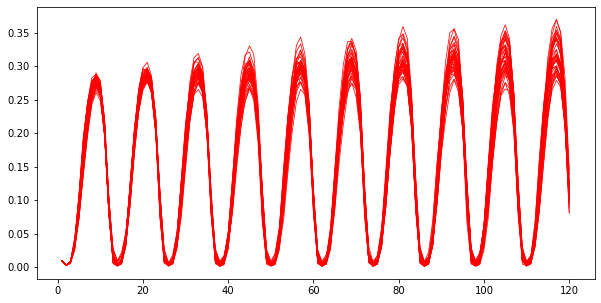

In [171]:
cn_mean = xr.open_dataset('/home/bbuchovecky/storage/so_predict_derived/CN_INV_ENSEMBLE/cn_inv_ens_so_monthly_mean.nc')
# cn_mean

fig,ax = plt.subplots(figsize=(10,5))
for ens in range(40):
    ax.plot(cn_mean['nT'], cn_mean['SouthernOcean'][0,ens], color='red', linewidth=0.75)

In [108]:
for d in pcs.dir_inspect(writedir):
    print(d.upper())
    try:
        for m in pcs.dir_inspect(writedir+d):
            print('    '+m)
    except:
        print('###')
    print()

CN_INV_ENSEMBLE
    cn_inv_ens01_global_monthly_mean.nc
    cn_inv_ens02_06_global_monthly_mean.nc
    cn_inv_ens_global_annual_mean.nc
    cn_inv_ens_global_monthly_mean.nc
    cn_inv_ens_so_annual_mean.nc
    cn_inv_ens_so_monthly_anom.nc
    cn_inv_ens_so_monthly_mean.nc

CTRL
    CN_INV
    MLD
    NPP
    PCO2SURF
    SIE
    SIV
    SI_EDGE
    SSS
    SST

MLD_ENSEMBLE
    mld_ens_global_annual_mean.nc
    mld_ens_global_monthly_mean.nc
    mld_ens_so_annual_mean.nc
    mld_ens_so_monthly_anom.nc
    mld_ens_so_monthly_mean.nc

NPP_ENSEMBLE
    npp_ens_global_annual_mean.nc
    npp_ens_global_monthly_mean.nc
    npp_ens_so_annual_mean.nc
    npp_ens_so_monthly_anom.nc
    npp_ens_so_monthly_mean.nc

PCO2SURF_ENSEMBLE
    pco2surf_ens_global_annual_mean.nc
    pco2surf_ens_global_monthly_mean.nc
    pco2surf_ens_so_annual_mean.nc
    pco2surf_ens_so_monthly_anom.nc
    pco2surf_ens_so_monthly_mean.nc

SIE_ENSEMBLE
    sie_ens_global_annual_mean.nc
    sie_ens_global_monthly_mean.

### Annual

In [60]:
compute_ens_so_mean([['SST','sst','sst']], 'annual', save=True)


######## SST ########

this_ens.coords = ['nT']
this_ens.data_vars = ['SouthernOcean', 'Weddell', 'Indian', 'WestPacific', 'Ross', 'AmundBell']

oooooooooooooooooooo
var: sst | nStart: 1 | nEns: 20/40
oooooooooooooooooooo
var: sst | nStart: 1 | nEns: 40/40

these_ens.coords = ['nT', 'nEns']
these_ens.data_vars = ['SouthernOcean', 'Weddell', 'Indian', 'WestPacific', 'Ross', 'AmundBell']

oooooooooooooooooooo
var: sst | nStart: 2 | nEns: 20/40
oooooooooooooooooooo
var: sst | nStart: 2 | nEns: 40/40
oooooooooooooooooooo
var: sst | nStart: 3 | nEns: 20/40
oooooooooooooooooooo
var: sst | nStart: 3 | nEns: 40/40
oooooooooooooooooooo
var: sst | nStart: 4 | nEns: 20/40
oooooooooooooooooooo
var: sst | nStart: 4 | nEns: 40/40
oooooooooooooooooooo
var: sst | nStart: 5 | nEns: 20/40
oooooooooooooooooooo
var: sst | nStart: 5 | nEns: 40/40
oooooooooooooooooooo
var: sst | nStart: 6 | nEns: 20/40
oooooooooooooooooooo
var: sst | nStart: 6 | nEns: 40/40

all_ens.coords = ['nT', 'nEns', 'nStart']
all_en

In [61]:
compute_ens_so_mean([['SSS','sss','sss']], 'annual', save=True)


######## SSS ########

this_ens.coords = ['nT']
this_ens.data_vars = ['SouthernOcean', 'Weddell', 'Indian', 'WestPacific', 'Ross', 'AmundBell']

oooooooooooooooooooo
var: sss | nStart: 1 | nEns: 20/40
oooooooooooooooooooo
var: sss | nStart: 1 | nEns: 40/40

these_ens.coords = ['nT', 'nEns']
these_ens.data_vars = ['SouthernOcean', 'Weddell', 'Indian', 'WestPacific', 'Ross', 'AmundBell']

oooooooooooooooooooo
var: sss | nStart: 2 | nEns: 20/40
oooooooooooooooooooo
var: sss | nStart: 2 | nEns: 40/40
oooooooooooooooooooo
var: sss | nStart: 3 | nEns: 20/40
oooooooooooooooooooo
var: sss | nStart: 3 | nEns: 40/40
oooooooooooooooooooo
var: sss | nStart: 4 | nEns: 20/40
oooooooooooooooooooo
var: sss | nStart: 4 | nEns: 40/40
oooooooooooooooooooo
var: sss | nStart: 5 | nEns: 20/40
oooooooooooooooooooo
var: sss | nStart: 5 | nEns: 40/40
oooooooooooooooooooo
var: sss | nStart: 6 | nEns: 20/40
oooooooooooooooooooo
var: sss | nStart: 6 | nEns: 40/40

all_ens.coords = ['nT', 'nEns', 'nStart']
all_en

In [62]:
compute_ens_so_mean([['MLD','mld','mld']], 'annual', save=True)


######## MLD ########

this_ens.coords = ['nT']
this_ens.data_vars = ['SouthernOcean', 'Weddell', 'Indian', 'WestPacific', 'Ross', 'AmundBell']

oooooooooooooooooooo
var: mld | nStart: 1 | nEns: 20/40
oooooooooooooooooooo
var: mld | nStart: 1 | nEns: 40/40

these_ens.coords = ['nT', 'nEns']
these_ens.data_vars = ['SouthernOcean', 'Weddell', 'Indian', 'WestPacific', 'Ross', 'AmundBell']

oooooooooooooooooooo
var: mld | nStart: 2 | nEns: 20/40
oooooooooooooooooooo
var: mld | nStart: 2 | nEns: 40/40
oooooooooooooooooooo
var: mld | nStart: 3 | nEns: 20/40
oooooooooooooooooooo
var: mld | nStart: 3 | nEns: 40/40
oooooooooooooooooooo
var: mld | nStart: 4 | nEns: 20/40
oooooooooooooooooooo
var: mld | nStart: 4 | nEns: 40/40
oooooooooooooooooooo
var: mld | nStart: 5 | nEns: 20/40
oooooooooooooooooooo
var: mld | nStart: 5 | nEns: 40/40
oooooooooooooooooooo
var: mld | nStart: 6 | nEns: 20/40
oooooooooooooooooooo
var: mld | nStart: 6 | nEns: 40/40

all_ens.coords = ['nT', 'nEns', 'nStart']
all_en

In [63]:
compute_ens_so_mean([['NPP','NPP','NPP']], 'annual', save=True)


######## NPP ########

this_ens.coords = ['nT']
this_ens.data_vars = ['SouthernOcean', 'Weddell', 'Indian', 'WestPacific', 'Ross', 'AmundBell']

oooooooooooooooooooo
var: NPP | nStart: 1 | nEns: 20/40
oooooooooooooooooooo
var: NPP | nStart: 1 | nEns: 40/40

these_ens.coords = ['nT', 'nEns']
these_ens.data_vars = ['SouthernOcean', 'Weddell', 'Indian', 'WestPacific', 'Ross', 'AmundBell']

oooooooooooooooooooo
var: NPP | nStart: 2 | nEns: 20/40
oooooooooooooooooooo
var: NPP | nStart: 2 | nEns: 40/40
oooooooooooooooooooo
var: NPP | nStart: 3 | nEns: 20/40
oooooooooooooooooooo
var: NPP | nStart: 3 | nEns: 40/40
oooooooooooooooooooo
var: NPP | nStart: 4 | nEns: 20/40
oooooooooooooooooooo
var: NPP | nStart: 4 | nEns: 40/40
oooooooooooooooooooo
var: NPP | nStart: 5 | nEns: 20/40
oooooooooooooooooooo
var: NPP | nStart: 5 | nEns: 40/40
oooooooooooooooooooo
var: NPP | nStart: 6 | nEns: 20/40
oooooooooooooooooooo
var: NPP | nStart: 6 | nEns: 40/40

all_ens.coords = ['nT', 'nEns', 'nStart']
all_en

In [64]:
compute_ens_so_mean([['PCO2SURF','pco2surf','pco2surf']], 'annual', save=True)


######## PCO2SURF ########

this_ens.coords = ['nT']
this_ens.data_vars = ['SouthernOcean', 'Weddell', 'Indian', 'WestPacific', 'Ross', 'AmundBell']

oooooooooooooooooooo
var: pco2surf | nStart: 1 | nEns: 20/40
oooooooooooooooooooo
var: pco2surf | nStart: 1 | nEns: 40/40

these_ens.coords = ['nT', 'nEns']
these_ens.data_vars = ['SouthernOcean', 'Weddell', 'Indian', 'WestPacific', 'Ross', 'AmundBell']

oooooooooooooooooooo
var: pco2surf | nStart: 2 | nEns: 20/40
oooooooooooooooooooo
var: pco2surf | nStart: 2 | nEns: 40/40
oooooooooooooooooooo
var: pco2surf | nStart: 3 | nEns: 20/40
oooooooooooooooooooo
var: pco2surf | nStart: 3 | nEns: 40/40
oooooooooooooooooooo
var: pco2surf | nStart: 4 | nEns: 20/40
oooooooooooooooooooo
var: pco2surf | nStart: 4 | nEns: 40/40
oooooooooooooooooooo
var: pco2surf | nStart: 5 | nEns: 20/40
oooooooooooooooooooo
var: pco2surf | nStart: 5 | nEns: 40/40
oooooooooooooooooooo
var: pco2surf | nStart: 6 | nEns: 20/40
oooooooooooooooooooo
var: pco2surf | nStart: 

In [65]:
compute_ens_so_mean([['CN','CN_inv','CN_INV']], 'annual', save=True)


######## CN ########

this_ens.coords = ['nT']
this_ens.data_vars = ['SouthernOcean', 'Weddell', 'Indian', 'WestPacific', 'Ross', 'AmundBell']

oooooooooooooooooooo
var: CN_INV | nStart: 1 | nEns: 20/40
oooooooooooooooooooo
var: CN_INV | nStart: 1 | nEns: 40/40

these_ens.coords = ['nT', 'nEns']
these_ens.data_vars = ['SouthernOcean', 'Weddell', 'Indian', 'WestPacific', 'Ross', 'AmundBell']

oooooooooooooooooooo
var: CN_INV | nStart: 2 | nEns: 20/40
oooooooooooooooooooo
var: CN_INV | nStart: 2 | nEns: 40/40
oooooooooooooooooooo
var: CN_INV | nStart: 3 | nEns: 20/40
oooooooooooooooooooo
var: CN_INV | nStart: 3 | nEns: 40/40
oooooooooooooooooooo
var: CN_INV | nStart: 4 | nEns: 20/40
oooooooooooooooooooo
var: CN_INV | nStart: 4 | nEns: 40/40
oooooooooooooooooooo
var: CN_INV | nStart: 5 | nEns: 20/40
oooooooooooooooooooo
var: CN_INV | nStart: 5 | nEns: 40/40
oooooooooooooooooooo
var: CN_INV | nStart: 6 | nEns: 20/40
oooooooooooooooooooo
var: CN_INV | nStart: 6 | nEns: 40/40

all_ens.coord

In [66]:
compute_ens_so_mean([['CN','CN_inv','CN_INV']], 'annual', save=True, SIE=True)


######## CN ########

this_ens.coords = ['nT']
this_ens.data_vars = ['SouthernOcean', 'Weddell', 'Indian', 'WestPacific', 'Ross', 'AmundBell']

oooooooooooooooooooo
var: CN_INV | nStart: 1 | nEns: 20/40
oooooooooooooooooooo
var: CN_INV | nStart: 1 | nEns: 40/40

these_ens.coords = ['nT', 'nEns']
these_ens.data_vars = ['SouthernOcean', 'Weddell', 'Indian', 'WestPacific', 'Ross', 'AmundBell']

oooooooooooooooooooo
var: CN_INV | nStart: 2 | nEns: 20/40
oooooooooooooooooooo
var: CN_INV | nStart: 2 | nEns: 40/40
oooooooooooooooooooo
var: CN_INV | nStart: 3 | nEns: 20/40
oooooooooooooooooooo
var: CN_INV | nStart: 3 | nEns: 40/40
oooooooooooooooooooo
var: CN_INV | nStart: 4 | nEns: 20/40
oooooooooooooooooooo
var: CN_INV | nStart: 4 | nEns: 40/40
oooooooooooooooooooo
var: CN_INV | nStart: 5 | nEns: 20/40
oooooooooooooooooooo
var: CN_INV | nStart: 5 | nEns: 40/40
oooooooooooooooooooo
var: CN_INV | nStart: 6 | nEns: 20/40
oooooooooooooooooooo
var: CN_INV | nStart: 6 | nEns: 40/40

all_ens.coord

In [67]:
compute_ens_so_mean([['HI','HI_ice','HI']], 'annual', save=True, SIV=True)


######## HI ########

this_ens.coords = ['nT']
this_ens.data_vars = ['SouthernOcean', 'Weddell', 'Indian', 'WestPacific', 'Ross', 'AmundBell']

oooooooooooooooooooo
var: HI | nStart: 1 | nEns: 20/40
oooooooooooooooooooo
var: HI | nStart: 1 | nEns: 40/40

these_ens.coords = ['nT', 'nEns']
these_ens.data_vars = ['SouthernOcean', 'Weddell', 'Indian', 'WestPacific', 'Ross', 'AmundBell']

oooooooooooooooooooo
var: HI | nStart: 2 | nEns: 20/40
oooooooooooooooooooo
var: HI | nStart: 2 | nEns: 40/40
oooooooooooooooooooo
var: HI | nStart: 3 | nEns: 20/40
oooooooooooooooooooo
var: HI | nStart: 3 | nEns: 40/40
oooooooooooooooooooo
var: HI | nStart: 4 | nEns: 20/40
oooooooooooooooooooo
var: HI | nStart: 4 | nEns: 40/40
oooooooooooooooooooo
var: HI | nStart: 5 | nEns: 20/40
oooooooooooooooooooo
var: HI | nStart: 5 | nEns: 40/40
oooooooooooooooooooo
var: HI | nStart: 6 | nEns: 20/40
oooooooooooooooooooo
var: HI | nStart: 6 | nEns: 40/40

all_ens.coords = ['nT', 'nEns', 'nStart']
all_ens.data_vars =

## Troubleshooting `CN_INV` Ensemble Data

`time` dimension length 240 instead of 120

In [71]:
# pcs.dir_inspect(rootdir+'CN_ENSEMBLE/')
# xr.open_dataset(rootdir+'CN_ENSEMBLE/CN_inv_ENS01_neg01_0170_0179.nc')
# xr.open_dataset(rootdir+'CN_ENSEMBLE/CN_inv_ENS02_neg01_0022_0031.nc')
# xr.open_dataset(rootdir+'CN_ENSEMBLE/CN_inv_ENS03_neg01_0064_0073.nc')
# xr.open_dataset(rootdir+'CN_ENSEMBLE/CN_inv_ENS04_neg01_0106_0115.nc')
# xr.open_dataset(rootdir+'CN_ENSEMBLE/CN_inv_ENS05_neg01_0232_0241.nc')
# xr.open_dataset(rootdir+'CN_ENSEMBLE/CN_inv_ENS06_neg01_0295_0304.nc')

In [173]:
ens = xr.open_dataset(rootdir+'CN_ENSEMBLE/CN_inv_ENS01_neg01_0170_0179.nc')
ens['TIME'] = xr.cftime_range(start='0000', periods=240, freq='MS', calendar='noleap')

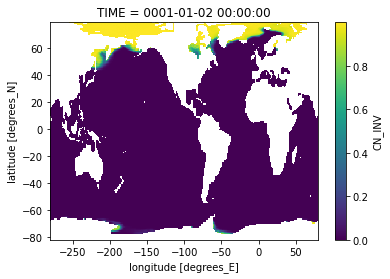

In [108]:
test = xr.open_dataset(rootdir+'CN_ENSEMBLE/CN_inv_ENS01_neg01_0170_0179.nc')
# test = test.mean(dim={'XT', 'YT'})

# fig,ax = plt.subplots(figsize=(10,5))
# ax.plot(np.arange(0,120), test['CN_INV'][:120]);
# ax.plot(np.arange(0,120), test['CN_INV'][120:]);

m = test.drop('TIME')
m = m.drop_vars('CN_INV')
m = m.assign_coords({'TIME':test['TIME'][:120]})
# m.assign_coords({'CN_INV':test['CN_INV'][:120], 'TIME':test['TIME'][:120]})
m['CN_INV'] = (('TIME', 'YT', 'XT'), test['CN_INV'][:120])
m['CN_INV'][0].plot()


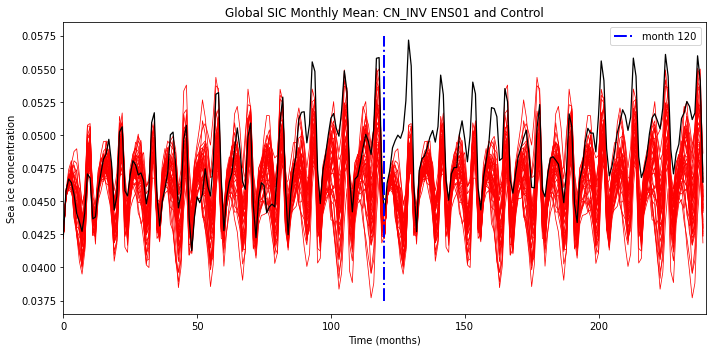

In [36]:
cn_ens01 = xr.open_dataset(writedir+'CN_INV_ENSEMBLE/cn_inv_ens01_global_monthly_mean.nc')
cn_ens01 = cn_ens01.assign_coords({'time':np.arange(1,241)})

cn_ctrl = cn_global_monthly_mean['Global'].isel(time=np.arange(169*12, (169*12)+240))
cn_ctrl = cn_ctrl.assign_coords({'time':np.arange(1,241)})

rng = np.arange(0,240)
x_max = rng.max()

fig,ax = plt.subplots(figsize=(10,5))

ax.plot(rng, cn_ctrl[rng], color='k', linewidth=1.25, zorder=50)

for ens in range(40):
    ax.plot(rng, cn_ens01['Global'][0,ens], color='red', linewidth=0.75)
        
ylim = abs(np.array(ax.get_ylim())).max()

ax.vlines(120,0.0375,0.0575,color='blue',ls='-.',linewidth=2,zorder=100,label='month 120')

ax.set(xlim=[0,x_max+1], title='Global SIC Monthly Mean: CN_INV ENS01 and Control', ylabel='Sea ice concentration', xlabel='Time (months)')
ax.legend()
fig.tight_layout()

In [216]:
## check that months 0-120 are the same as months 120-240
cn_ens01 = xr.open_dataset(writedir+'CN_INV_ENSEMBLE/cn_inv_ens01_global_monthly_mean.nc')
cn_ens01 = cn_ens01.assign_coords({'time':np.arange(1,241)})

for ens in range(40):
    for m in range(120):
        if cn_ens01['Global'][0,ens,m] != cn_ens01['Global'][0,ens,m+120]:
            print('diff: ens'+ens+' month'+m)
        
## all the same

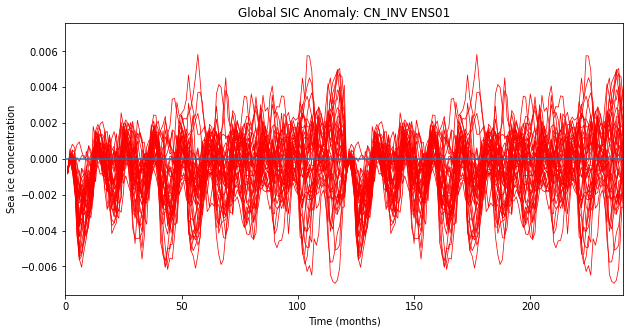

In [97]:
cn_anom = xr.open_dataset('/home/bbuchovecky/storage/so_predict_derived/CN_INV_ENSEMBLE/cn_inv_ens_global_monthly_anom.nc')

fig,ax = plt.subplots(figsize=(10,5))

for ens in range(40):
    ax.plot(cn_anom['nT'], cn_anom['Global'][0,ens], color='red', linewidth=0.75)

ax.hlines(0, 0,240, zorder=50)

ylim = abs(np.array(ax.get_ylim())).max()
ax.set(xlim=[0,240], ylim=[-ylim, ylim], xlabel='Time (months)', ylabel='Sea ice concentration');
ax.set_title('Global SIC Anomaly: CN_INV ENS01');


In [196]:
def compute_ens_anom_from_clim_CN(var, timescale, clim, regional=True, save=False):
    
    writedir = '/home/bbuchovecky/storage/so_predict_derived/'
    subdir = var.upper()+'_ENSEMBLE/'
    
    ## open the ensemble timeseries
    if regional:
        ens_mean = xr.open_dataset(writedir+subdir+var.lower()+'_ens_so_'+timescale+'_mean.nc')
    elif not regional:
        ens_mean = xr.open_dataset(writedir+subdir+var.lower()+'_ens01_global_'+timescale+'_mean.nc')
    
    ## create list of regions (either SO regions or Global)
    regions = list(ens_mean.data_vars)
        
    ## create a copy of the ensemble timeseries to overwrite with anomaly data
    ens_anom = ens_mean.copy(deep=True)
        
    ## iterate through all start years
    for s in range(ens_anom['nStart'].size):
        ## iterate through each perturbation
        for e in range(ens_anom['nEns'].size):
            ## iterate through all regions
            for reg in regions:
                ## create a NumPy array of the ensemble data
                np_mean = ens_mean[reg][s,e].values

                ## if SST, adjust units for climatology back to Kelvin
                if var.lower() == 'sst':
                    np_clim = clim[reg].values + 273.15
                else:
                    np_clim = clim[reg].values 

                ## calculate the anomaly between the ensemble data and the
                ## control run climatology 
                ## (Jan_ens - Jan_ctrl, Feb_ens - Feb_ctrl, etc.)                    
                reg_anom = np.zeros(240)
                for m in range(240):
                    reg_anom[m] = np_mean[m] - np_clim[m%12]

                ens_anom[reg][s,e] = reg_anom
                
    ## add description
    if len(regions) > 1:
        filename = var.lower()+'_ens01_so_'+timescale+'_anom.nc'
    elif len(regions) == 1:
        filename = var.lower()+'_ens01_global_'+timescale+'_anom.nc'
    ens_anom.attrs['name'] = filename
    
    if save:
        ens_anom.to_netcdf(writedir+subdir+filename)
        print(writedir+subdir+filename)
    elif not save:
        return ens_anom

# ANOMALY

In [6]:
def compute_ens_anom(var, timescale, clim, regional=True, save=False):
    
    writedir = '/home/bbuchovecky/storage/so_predict_derived/'
    subdir = var.upper()+'_ENSEMBLE/'
    
    ## open the ensemble timeseries
    if regional:
        ens_mean = xr.open_dataset(writedir+subdir+var.lower()+'_ens_so_'+timescale+'_mean.nc')
    elif not regional:
        ens_mean = xr.open_dataset(writedir+subdir+var.lower()+'_ens_global_'+timescale+'_mean.nc')
    
    ## create list of regions (either SO regions or Global)
    regions = list(ens_mean.data_vars)
        
    ## create a copy of the ensemble timeseries to overwrite with anomaly data
    ens_anom = ens_mean.copy(deep=True)
        
    ## iterate through all start years
    for s in range(ens_anom['nStart'].size):
        ## iterate through each perturbation
        for e in range(ens_anom['nEns'].size):
            ## iterate through all regions
            for reg in regions:
                ## create a NumPy array of the ensemble data
                np_mean = ens_mean[reg][s,e].values

                ## if SST, adjust units of climatology back to Kelvin
                if var.lower() == 'sst':
                    np_clim = clim[reg].values + 273.15
                else:
                    np_clim = clim[reg].values 

                ## calculate the anomaly between the ensemble data and the
                ## control run climatology 
                ## (Jan_ens - Jan_ctrl, Feb_ens - Feb_ctrl, etc.)                    
                reg_anom = np.zeros(120)
                for m in range(120):
                    reg_anom[m] = np_mean[m] - np_clim[m%12]

                ens_anom[reg][s,e] = reg_anom
                
    ## add description
    if len(regions) > 1:
        filename = var.lower()+'_ens_so_'+timescale+'_anom.nc'
    elif len(regions) == 1:
        filename = var.lower()+'_ens_global_'+timescale+'_anom.nc'
    ens_anom.attrs['name'] = filename
    
    if save:
        ens_anom.to_netcdf(writedir+subdir+filename)
        print(writedir+subdir+filename)
    elif not save:
        return ens_anom

## Global

In [8]:
compute_ens_anom('sst', 'monthly', sst_global_monthly_clim, save=True, regional=False)

/home/bbuchovecky/storage/so_predict_derived/SST_ENSEMBLE/sst_ens_global_monthly_anom.nc


In [9]:
compute_ens_anom('sss', 'monthly', sss_global_monthly_clim, save=True, regional=False)

/home/bbuchovecky/storage/so_predict_derived/SSS_ENSEMBLE/sss_ens_global_monthly_anom.nc


In [10]:
compute_ens_anom('mld', 'monthly', mld_global_monthly_clim, save=True, regional=False)

/home/bbuchovecky/storage/so_predict_derived/MLD_ENSEMBLE/mld_ens_global_monthly_anom.nc


In [11]:
compute_ens_anom('npp', 'monthly', npp_global_monthly_clim, save=True, regional=False)

/home/bbuchovecky/storage/so_predict_derived/NPP_ENSEMBLE/npp_ens_global_monthly_anom.nc


In [12]:
compute_ens_anom('pco2surf', 'monthly', pco2_global_monthly_clim, save=True, regional=False)

/home/bbuchovecky/storage/so_predict_derived/PCO2SURF_ENSEMBLE/pco2surf_ens_global_monthly_anom.nc


In [13]:
compute_ens_anom('cn_inv', 'monthly', cn_global_monthly_clim, save=True, regional=False)

/home/bbuchovecky/storage/so_predict_derived/CN_INV_ENSEMBLE/cn_inv_ens_global_monthly_anom.nc


In [14]:
compute_ens_anom('sie', 'monthly', sie_global_monthly_clim, save=True, regional=False)

/home/bbuchovecky/storage/so_predict_derived/SIE_ENSEMBLE/sie_ens_global_monthly_anom.nc


In [15]:
compute_ens_anom('siv', 'monthly', siv_global_monthly_clim, save=True, regional=False)

/home/bbuchovecky/storage/so_predict_derived/SIV_ENSEMBLE/siv_ens_global_monthly_anom.nc


## Southern Ocean Regions

In [7]:
compute_ens_anom('sst', 'monthly', sst_so_monthly_clim, save=True)

/home/bbuchovecky/storage/so_predict_derived/SST_ENSEMBLE/sst_ens_so_monthly_anom.nc


In [98]:
compute_ens_anom('sss', 'monthly', sss_so_monthly_clim, save=True)

/home/bbuchovecky/storage/so_predict_derived/SSS_ENSEMBLE/sss_ens_so_monthly_anom.nc


In [99]:
compute_ens_anom('mld', 'monthly', mld_so_monthly_clim, save=True)

/home/bbuchovecky/storage/so_predict_derived/MLD_ENSEMBLE/mld_ens_so_monthly_anom.nc


In [100]:
compute_ens_anom('npp', 'monthly', npp_so_monthly_clim, save=True)

/home/bbuchovecky/storage/so_predict_derived/NPP_ENSEMBLE/npp_ens_so_monthly_anom.nc


In [101]:
compute_ens_anom('pco2surf', 'monthly', pco2_so_monthly_clim, save=True)

/home/bbuchovecky/storage/so_predict_derived/PCO2SURF_ENSEMBLE/pco2surf_ens_so_monthly_anom.nc


In [102]:
compute_ens_anom('cn_inv', 'monthly', cn_so_monthly_clim, save=True)

/home/bbuchovecky/storage/so_predict_derived/CN_INV_ENSEMBLE/cn_inv_ens_so_monthly_anom.nc


In [103]:
compute_ens_anom('sie', 'monthly', sie_so_monthly_clim, save=True)

/home/bbuchovecky/storage/so_predict_derived/SIE_ENSEMBLE/sie_ens_so_monthly_anom.nc


In [104]:
compute_ens_anom('siv', 'monthly', siv_so_monthly_clim, save=True)

/home/bbuchovecky/storage/so_predict_derived/SIV_ENSEMBLE/siv_ens_so_monthly_anom.nc


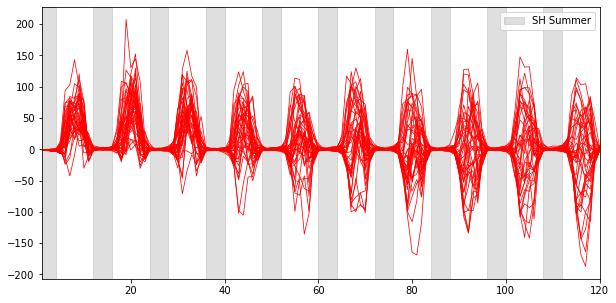

In [35]:
t= xr.open_dataset('/home/bbuchovecky/storage/so_predict_derived/MLD_ENSEMBLE/mld_ens_so_monthly_anom.nc')

fig,ax = plt.subplots(figsize=(10,5))

for ens in range(40):
    ax.plot(t['nT'], t['SouthernOcean'][0,ens], color='red', linewidth=0.75)
    
## highlight summer region - when SST variance is greater
for yr in np.arange(0,120,12):
    ax.axvspan(yr, yr+4, alpha=0.25, color='gray')

ax.axvspan(-2, 0, alpha=0.25, color='gray',label='SH Summer')
ax.set(xlim=[1,120]);
ax.legend();

## Exploring anomaly data
Comparing to Figure 1 from Froelicher et al. 2020.

In [31]:
ens_clim_anom = compute_ens_anom_from_clim('sst', 'monthly', sst_global_monthly_clim, regional=False)
ens_mean_anom = compute_ens_anom_from_mean('sst', 'monthly', sst_global_monthly_mean, regional=False)

In [32]:
ens_mean = xr.open_dataset(writedir+'SST_ENSEMBLE/sst_ens_global_monthly_mean.nc')

In [33]:
ctrl_mean = sst_global_monthly_mean['Global'].isel(time=np.arange(169*12, (169*12)+120))

In [34]:
ctrl_anom = xr.open_dataset(writedir+'CTRL/SST/sst_global_monthly_anom.nc')
ctrl_anom = ctrl_anom['Global'].isel(month=np.arange(169*12, (169*12)+120))

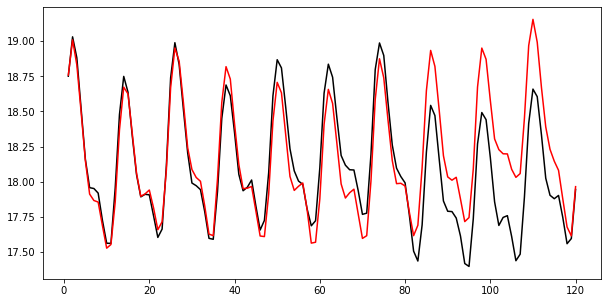

In [35]:
rng = np.arange(0,120)

fig,ax = plt.subplots(figsize=(10,5))

# ax.plot(ens_clim_anom['nT'][rng], ens_clim_anom['Global'][0,0,rng], color='red')
# ax.plot(ens_mean_anom['nT'][rng], ens_mean_anom['Global'][0,0,rng], color='blue')
# ax.plot(ens_mean_anom['nT'][rng], ctrl_anom[rng], color='black')

ax.plot(ens_mean['nT'][rng], ctrl_mean[rng], color='black');
ax.plot(ens_mean['nT'][rng], ens_mean['Global'][0,0,rng]-273.15, color='red');

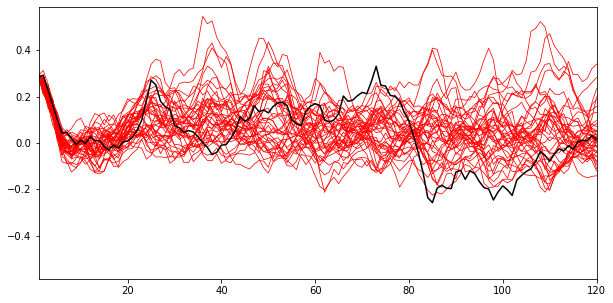

In [36]:
rng = np.arange(0,120)

fig,ax = plt.subplots(figsize=(10,5))

for ens in range(40):
    ax.plot(ens_clim_anom['nT'][rng], ens_clim_anom['Global'][0,ens,rng], color='red', linewidth=0.75)
#     ax.plot(ens_mean_anom['nT'][rng], ens_mean_anom['Global'][0,ens,rng], color='blue')
#     ax.plot(ens_clim_anom['nT'][rng], ens_clim_anom['Global'][0,ens,rng] - ctrl_anom[rng].values, color='red', linewidth=0.75)

ax.plot(ens_mean_anom['nT'][rng], ctrl_anom[rng], color='black')

# for ens in range(40):
    # ax.plot(ens_mean['nT'][rng], ens_mean['Global'][0,0,rng]-273.15, color='red')
    # ax.plot(ens_mean['nT'][rng], ctrl_mean[rng], color='black')

ylim = abs(np.array(ax.get_ylim())).max()
ax.set(xlim=[rng.min()+1, rng.max()+1], ylim=[-ylim,ylim]);

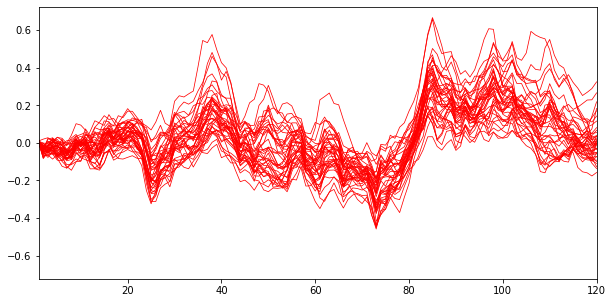

In [37]:
fig,ax = plt.subplots(figsize=(10,5))

for ens in range(40):
    diff = ens_clim_anom['Global'][0,ens] - ctrl_anom.values
    ax.plot(ens_clim_anom['nT'], diff, color='red', linewidth=0.75)
    
#     ax.plot(ens_clim_anom['nT'], ens_clim_anom['Global'][0,ens], color='red', linewidth=0.75)

ylim = abs(np.array(ax.get_ylim())).max()
ax.set(xlim=[1,120], ylim=[-ylim,ylim]);

In [42]:
compute_ens_anom_from_clim('sst', 'monthly', sst_so_monthly_clim, save=True)
compute_ens_anom_from_clim('sss', 'monthly', sss_so_monthly_clim, save=True)
compute_ens_anom_from_clim('mld', 'monthly', mld_so_monthly_clim, save=True)
compute_ens_anom_from_clim('NPP', 'monthly', npp_so_monthly_clim, save=True)
compute_ens_anom_from_clim('pco2surf', 'monthly', pco2_so_monthly_clim, save=True)

# compute_ens_anom_from_clim('CN_inv', 'monthly', cn_so_monthly_clim, save=True)

/home/bbuchovecky/storage/so_predict_derived/SST_ENSEMBLE/sst_ens_so_monthly_anom.nc
/home/bbuchovecky/storage/so_predict_derived/SSS_ENSEMBLE/sss_ens_so_monthly_anom.nc
/home/bbuchovecky/storage/so_predict_derived/MLD_ENSEMBLE/mld_ens_so_monthly_anom.nc
/home/bbuchovecky/storage/so_predict_derived/NPP_ENSEMBLE/npp_ens_so_monthly_anom.nc
/home/bbuchovecky/storage/so_predict_derived/PCO2SURF_ENSEMBLE/pco2surf_ens_so_monthly_anom.nc


In [70]:
pcs.dir_inspect('/home/bbuchovecky/storage/so_predict_derived/SSS_ENSEMBLE')

['sss_ens_global_monthly_mean.nc',
 'sss_ens_so_monthly_anom.nc',
 'sss_ens_so_monthly_mean.nc']

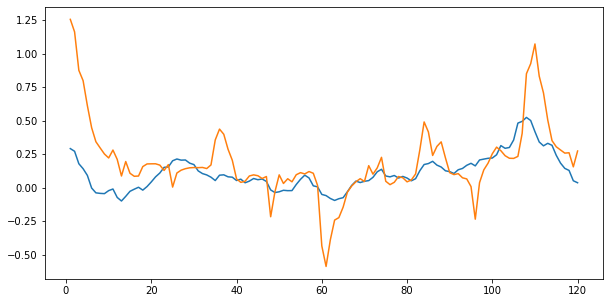

In [68]:
anom = xr.open_dataset('/home/bbuchovecky/storage/so_predict_derived/SST_ENSEMBLE/sst_ens_global_monthly_anom.nc')
mean = xr.open_dataset('/home/bbuchovecky/storage/so_predict_derived/SST_ENSEMBLE/sst_ens_global_monthly_mean.nc')
so_anom = xr.open_dataset('/home/bbuchovecky/storage/so_predict_derived/SST_ENSEMBLE/sst_ens_so_monthly_anom.nc')
so_mean = xr.open_dataset('/home/bbuchovecky/storage/so_predict_derived/SST_ENSEMBLE/sst_ens_so_monthly_mean.nc')

fig,ax = plt.subplots(figsize=(10,5))

ax.plot(anom['nT'], anom['Global'][0,0]);
# ax.plot(mean['nT'], mean['Global'][0,0]);
ax.plot(so_anom['nT'], so_anom['SouthernOcean'][0,0])
# ax.plot(so_mean['nT'], so_mean['SouthernOcean'][0,0])

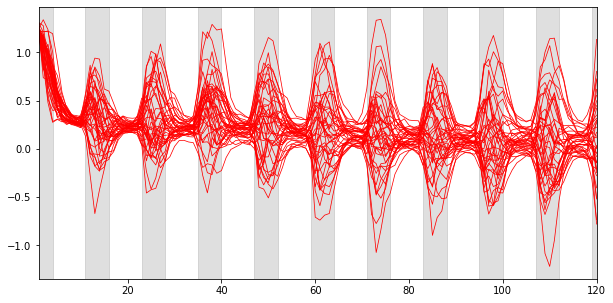

In [29]:
sst_ens_anom = xr.open_dataset('/home/bbuchovecky/storage/so_predict_derived/SST_ENSEMBLE/sst_ens_so_monthly_anom.nc')

size = (10,5)
fig,ax = plt.subplots(figsize=size)

for ens in range(40):
    ax.plot(sst_ens_anom['nT'], sst_ens_anom['SouthernOcean'].isel(nStart=0,nEns=ens), color='red', linewidth=0.75)

## highlight summer region
for yr in np.arange(-1,120,12):
    ax.axvspan(yr, yr+5, alpha=0.25, color='gray')

ax.set(xlim=[1,120]);

# Inter-ensemble Variance

$$ PPP(t) = 1 - \frac{\frac{1}{N(M - 1)} \sum\limits_{j=1}^{N} \sum\limits_{I=1}^{M} (X_{ij} - \overline{X}_{j}(t))^{2}}{\sigma_{c}^{2}} $$

"where $X_{ij}$ is the value of a given variable for the $j$th ensemble and $i$th ensemble member, $\overline{X}_{j}$ is the mean of the $j$th ensemble over all ensemble members, $\sigma_{c}^{2}$ is the variance of the control simulation, $N$ is the total number of different ensemble simulations ($N$=6) and $M$ the number of ensemble members ($M$=40)" - Froelicher et al. 2020

# Figures

# Misc

In [30]:
## DON'T USE ##
def compute_ens_anom_from_mean(var, timescale, ctrl_mean, regional=True, save=False):
    
    writedir = '/home/bbuchovecky/storage/so_predict_derived/'
    subdir = var.upper()+'_ENSEMBLE/'
    
    if regional:
        ens_mean = xr.open_dataset(writedir+subdir+var.lower()+'_ens_so_'+timescale+'_mean.nc')
    elif not regional:
        ens_mean = xr.open_dataset(writedir+subdir+var.lower()+'_ens_global_'+timescale+'_mean.nc')
    ens_anom = ens_mean.copy(deep=True)
    
    regions = list(ens_mean.data_vars)
        
    for (s,nS) in zip(ens_anom['nStart'].values, range(ens_anom['nStart'].size)):
        
        start_yr = int(s.split('_')[0][1:]) - 1
        start_mth = start_yr * 12
        if start_mth+120 < 3600:
            start_rng = np.arange(start_mth, start_mth+120, 1)
        else:
            start_rng = np.arange(start_mth, 3600, 1)
        
        for (e,nE) in zip(ens_anom['nEns'].values, range(ens_anom['nEns'].size)):  
            
            for reg in regions:
                np_mean = ens_mean[reg][nS,nE]

                if var.lower() == 'sst':
                    np_ctrl = ctrl_mean[reg].isel(time=start_rng).values + 273.15
                else:
                    np_ctrl = ctrl_mean[reg].isel(time=start_rng).values

                if np_ctrl.size < 120:
#                         np_mean = np_mean[0:np_ctrl.size]
                    break

                reg_anom = np_mean - np_ctrl

                ens_anom[reg][nS,nE] = reg_anom
            
    ## add description
    if regional:
        filename = var.lower()+'_ens_so_'+timescale+'_anom.nc'
    elif not regional:
        filename = var.lower()+'_ens_global_'+timescale+'_anom.nc'
    ens_anom.attrs['name'] = filename
    
    if save:
        ens_anom.to_netcdf(writedir+subdir+filename)
        print(writedir+subdir+filename)
    elif not save:
        return ens_anom